## 🏡📈 Analyse Approfondie des Prix Immobiliers : Défis et Solutions en Régression

#### LEPERCQ Louise, NITA Carmen Andreea, SARR Adja, THIOUNE Magatte Niang - M2 SIAD Projet BI / Big Data

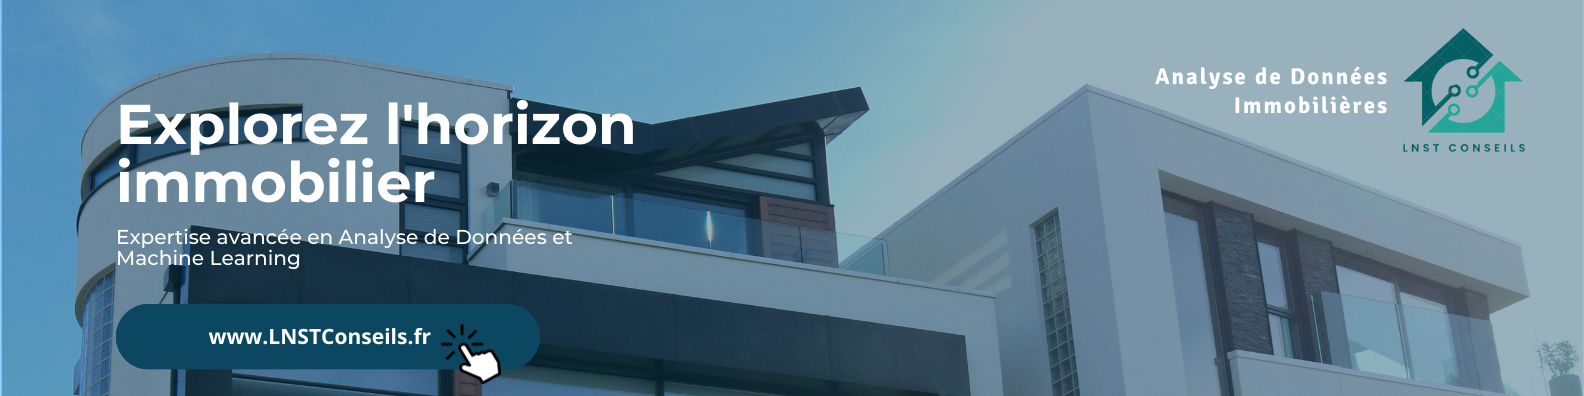

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">
💡 <strong> Compétition Kaggle </strong>

House Prices - Advanced Regression Techniques : Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

</div>

## Etape 5 - Regroupements de modalités

1. [Introduction](#introduction)
1. [Regroupements de modalités](#regroupements)
  1. [Type de variables](#Type_variable)
  1. [Feature Engineering](#feature_engineering)
    1. [Regroupements modalités variables catégorielle](#modalité_cat)
    1. [Regroupements modalités variables numérique](#modalité_num)

# Partie 1 - Introduction <a class="anchor"  id="introduction"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px; display: inline-block;">

- Depuis plusieurs années, le marché de l’immobilier fluctue. Plusieurs facteurs entrent en jeu, chacun contribuant à l'évolution complexe du **marché immobilier**. Lorsque l’économie progresse, la demande de logements augmente généralement, ce qui peut impacter positivement les prix des logements. Et inversement, une baisse de l'économie peut provoquer une baisse des prix des logements. De plus, un autre facteur qui peut impacter les prix des logements est la localisation des logements. Les prix des logements en métropole seront plus élevés que les prix des logements se situant en pleine campagne. Puis, les caractéristiques du logement seront aussi déterminants pour le prix du logement.

- Aujourd’hui notre entreprise **LNST Conseils** a été missionnée de réaliser une **analyse prédictive des prix des logements**. Pour cela, nous avons un disposition un fichier dans lequel nous pouvons retrouver des caractéristiques du logement, ainsi que des informations sur la localisation du logement. Ce fichier va nous servir à tester différents modèles de prédiction et une fois affiner, le modèle sera capable de prédire le prix des logements selon leurs caractéristiques.

- Ce projet est ancré au sein de la **compétition Kaggle "House Prices - Advanced Regression Techniques"**. L'objectif fondamental qui sous-tend cette initiative est d'exploiter des approches avancées en matière de régression, notamment le *feature engineering* et la construction des modèles de prédiction des prix immobiliers d'une grande robustesse.

- L'**objectif** ultime est de développer un modèle qui puisse offrir des prédictions fiables et précises sur les prix immobiliers. Cette compétition Kaggle offre une opportunité exceptionnelle d'explorer et de mettre en œuvre des techniques de pointe en matière d'apprentissage automatique pour résoudre un défi concret dans le domaine de l'immobilier.

</div>

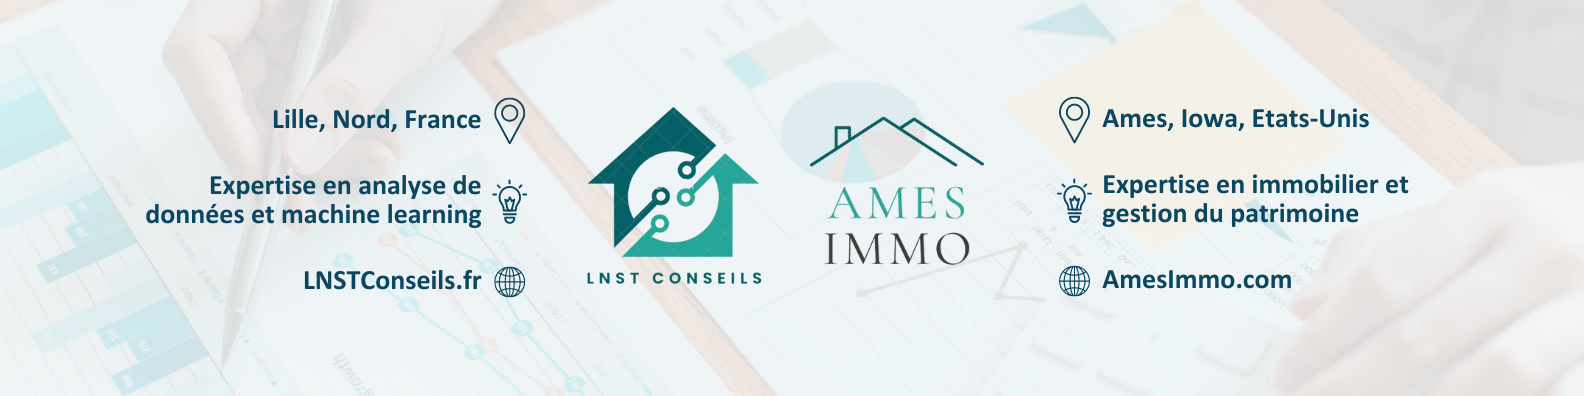

# Partie 2 - Regroupements de modalités <a class="anchor"  id="regroupements"></a>
-----------------

<div class="alert alert-block alert-primary"; style="background-color: #BEDEDF; padding: 10px; display: inline-block;">
💡 <strong> Observation </strong>

Cette section concerne l'importation de diverses bibliothèques Python ainsi que de l'importation de la base de données finale de la deuxième étape.

</div>

In [ ]:
# Importation des bibliothèques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Création du dataframe

df = pd.read_csv('data_etape3.csv', sep = ',')
df.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,ancienneteConstruction,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne
0,856,854,0,No alley access,3,1Fam,TA,No,706.0,0.0,...,5,237,2-2008,1,0,0,0,3.5,12,6.0
1,1262,0,0,No alley access,3,1Fam,TA,Gd,978.0,0.0,...,31,234,5-2007,1,1,0,0,2.5,14,7.0
2,920,866,0,No alley access,3,1Fam,TA,Mn,486.0,0.0,...,7,250,9-2008,1,0,0,0,3.5,12,6.0
3,961,756,0,No alley access,3,1Fam,Gd,No,216.0,0.0,...,91,229,2-2006,1,0,0,0,2.0,12,6.0
4,1145,1053,0,No alley access,4,1Fam,TA,Av,655.0,0.0,...,8,310,12-2008,1,0,0,0,3.5,13,6.5


In [ ]:
df.shape

(2903, 106)

In [ ]:
VM = df.isnull().sum()
VM2=VM[VM > 0]
VM2

prix    1459
dtype: int64

## Vérification types variables <a class="anchor"  id="Type_variable"></a>

In [ ]:
#Liste des variables de type 'Object'
for col in df.select_dtypes('object', 'category') :
    print(f'{col :-<20}, {df[col].unique()}')

typeAlleeAcces------, ['No alley access' 'Grvl' 'Pave']
typeBatiment--------, ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
conditionSousSol----, ['TA' 'Gd' 'No Basement' 'Fa' 'Po']
expositionSousSol---, ['No' 'Gd' 'Mn' 'Av' 'No Basement']
qualiteSurfaceFinieSousSol1, ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
qualiteSurfaceFinieSousSol2, ['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
qualiteSousSol------, ['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
climatisation-------, ['Y' 'N']
proxRoute1----------, ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
proxRoute2----------, ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
systElectrique------, ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
conditionExterieur--, ['TA' 'Gd' 'Fa' 'Po' 'Ex']
qualiteExterieur----, ['Gd' 'TA' 'Ex' 'Fa']
materiauExterieur1--, ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'Inconnu']


In [ ]:
# Vérification du type des variables numériques
# Nous procédons d'abord à la vérification de la distribution des variables numériques
for col in df.columns:
    if df[col].dtype != ['category', 'object']:
        print(f'{col :-<25}, Min: {df[col].min()}, Max: {df[col].max()}')

superficieEtage1---------, Min: 334, Max: 5095
superficieEtage2---------, Min: 0, Max: 1862
superficieRallonge3Saisons, Min: 0, Max: 508
typeAlleeAcces-----------, Min: Grvl, Max: Pave
nbChambres---------------, Min: 0, Max: 8
typeBatiment-------------, Min: 1Fam, Max: TwnhsE
conditionSousSol---------, Min: Fa, Max: TA
expositionSousSol--------, Min: Av, Max: No Basement
superficieFinieSousSol1--, Min: 0.0, Max: 4010.0
superficieFinieSousSol2--, Min: 0.0, Max: 1526.0
qualiteSurfaceFinieSousSol1, Min: ALQ, Max: Unf
qualiteSurfaceFinieSousSol2, Min: ALQ, Max: Unf
nbSallesBainSs-----------, Min: 0.0, Max: 3.0
nbDemiSallesBainSs-------, Min: 0.0, Max: 2.0
qualiteSousSol-----------, Min: Ex, Max: TA
superficieSousSolNonAmenagee, Min: 0.0, Max: 2336.0
climatisation------------, Min: N, Max: Y
proxRoute1---------------, Min: Artery, Max: RRNn
proxRoute2---------------, Min: Artery, Max: RRNn
systElectrique-----------, Min: FuseA, Max: SBrkr
superficiePorcheFerme----, Min: 0, Max: 1012
conditi

In [ ]:
# Récupération des noms des variables afin de faciliter leur réutilisation dans le code ultérieurement
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_columns)

['superficieEtage1', 'superficieEtage2', 'superficieRallonge3Saisons', 'nbChambres', 'superficieFinieSousSol1', 'superficieFinieSousSol2', 'nbSallesBainSs', 'nbDemiSallesBainSs', 'superficieSousSolNonAmenagee', 'superficiePorcheFerme', 'nbCheminees', 'nbSallesBain', 'superficieGarage', 'nbPlacesVoiture', 'anneeConstrGarage', 'superficieHabitableSaufSs', 'nbDemiSallesBain', 'id', 'nbCuisines', 'superficieTerrain', 'longTerrainRue', 'superficieQualiteInferieure', 'typeClasseBatiment', 'superficiePlacageMaconnerie', 'valeursElementsDivers', 'moisVente', 'superficiePorcheOuvert', 'conditionGlobale', 'qualiteGlobale', 'superficiePiscine', 'prix', 'superficieSolarium', 'nbPieces', 'superficieTotaleSousSol', 'superficieTerrasseBois', 'anneeConstruction', 'anneeRenovation', 'anneeVente', 'taux_inflation', 'changement_annuel_taux_inflation', 'annee_taux_inflation', 'ames_taux_criminalite', 'iowa_taux_criminalite', 'etatsunis_taux_criminalite', 'annee_taux_criminalite', 'annee_indice_prix_logeme

In [ ]:
# Transformation des variables catégorielles de type 'float' ou 'int' en type 'category'
columns_to_convert = ['typeClasseBatiment', 'qualiteGlobale', 'conditionGlobale',
                     'route_ville', 'autoroute', 'proximite_gare', 'proximite_parc']

def convert_to_categorical(data_etape3, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

df = convert_to_categorical(df, columns_to_convert)

print(df.dtypes)

superficieEtage1                 int64
superficieEtage2                 int64
superficieRallonge3Saisons       int64
typeAlleeAcces                  object
nbChambres                       int64
                                ...   
proximite_gare                category
proximite_parc                category
nbTotalSallesBain              float64
noteGlobale                      int64
noteMoyenne                    float64
Length: 106, dtype: object


In [ ]:
# Vérification du type des variables numériques
# Nous procédons d'abord à la vérification de la distribution des variables numériques
for col in df.columns:
    if df[col].dtype not in ['category', 'object']:
        print(f'{col :-<25}, Min: {df[col].min()}, Max: {df[col].max()}')

superficieEtage1---------, Min: 334, Max: 5095
superficieEtage2---------, Min: 0, Max: 1862
superficieRallonge3Saisons, Min: 0, Max: 508
nbChambres---------------, Min: 0, Max: 8
superficieFinieSousSol1--, Min: 0.0, Max: 4010.0
superficieFinieSousSol2--, Min: 0.0, Max: 1526.0
nbSallesBainSs-----------, Min: 0.0, Max: 3.0
nbDemiSallesBainSs-------, Min: 0.0, Max: 2.0
superficieSousSolNonAmenagee, Min: 0.0, Max: 2336.0
superficiePorcheFerme----, Min: 0, Max: 1012
nbCheminees--------------, Min: 0, Max: 4
nbSallesBain-------------, Min: 0, Max: 4
superficieGarage---------, Min: 0.0, Max: 138.23972352
nbPlacesVoiture----------, Min: 0.0, Max: 5.0
anneeConstrGarage--------, Min: 0.0, Max: 2207.0
superficieHabitableSaufSs, Min: 31.02961536, Max: 473.3409888000001
nbDemiSallesBain---------, Min: 0, Max: 2
id-----------------------, Min: 1, Max: 2919
nbCuisines---------------, Min: 0, Max: 3
superficieTerrain--------, Min: 120.773952, Max: 6573.91201344
longTerrainRue-----------, Min: 6.4008, 

##Feature engineering <a class="anchor"  id="feature_engineering"></a>

<div class="alert alert-block alert-primary"; style="background-color: #cce5ff; padding: 10px;">
📚 <strong> Définition </strong>

La *feature engineering* se concentre sur l'optimisation des caractéristiques des données pour améliorer les performances des modèles. Deux aspects clés de cette pratique incluent le regroupement de variables et la création de nouvelles variables.
    
- Le **regroupement de variables** consiste à combiner, transformer ou simplifier des caractéristiques existantes pour réduire la complexité et améliorer la pertinence pour le modèle. Par exemple, dans le contexte immobilier, la fusion de plusieurs caractéristiques liées à la superficie d'une maison peut simplifier la représentation tout en maintenant l'information essentielle.
- La **création de nouvelles variables** englobe le développement de caractéristiques supplémentaires à partir des données existantes, offrant ainsi une perspective plus riche au modèle. Ces pratiques, souvent itératives, visent à enrichir la représentation des données, conduisant ainsi à des modèles plus performants et plus précis.
    
</div>



#### Regroupement des modalités des variables catégorielle <a class="anchor"  id="modalité_cat"></a>

In [ ]:
# Récupération des variables catégorielles
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Afficher les noms des variables catégorielles
print(categorical)

['typeAlleeAcces', 'typeBatiment', 'conditionSousSol', 'expositionSousSol', 'qualiteSurfaceFinieSousSol1', 'qualiteSurfaceFinieSousSol2', 'qualiteSousSol', 'climatisation', 'proxRoute1', 'proxRoute2', 'systElectrique', 'conditionExterieur', 'qualiteExterieur', 'materiauExterieur1', 'materiauExterieur2', 'cloture', 'qualiteCheminee', 'fondation', 'fonctionnalites', 'conditionGarage', 'interieurGarage', 'qualiteGarage', 'typeGarage', 'chauffage', 'qualiteChauffage', 'styleBatiment', 'qualiteCuisine', 'contourTerrain', 'penteTerrain', 'configTerrain', 'formeTerrain', 'typeClasseBatiment', 'zonage', 'typePlacageMaconnerie', 'elementsDivers', 'quartier', 'conditionGlobale', 'qualiteGlobale', 'alleePavee', 'qualitePiscine', 'materiauToit', 'styleToit', 'conditionVente', 'typeVente', 'typeRouteAcces', 'utilites', 'date_taux_inflation', 'date_taux_criminalite', 'Coordonnées', 'mois_anneeVente', 'route_ville', 'autoroute', 'proximite_gare', 'proximite_parc']


In [ ]:
# Affichage des modalités de chaque variable catégorielle afin de déterminer lesquelles seront renommées et/ou regroupées

for col in categorical :
    print(f'{col :-<20}, {df[col].unique()}')

typeAlleeAcces------, ['No alley access' 'Grvl' 'Pave']
typeBatiment--------, ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
conditionSousSol----, ['TA' 'Gd' 'No Basement' 'Fa' 'Po']
expositionSousSol---, ['No' 'Gd' 'Mn' 'Av' 'No Basement']
qualiteSurfaceFinieSousSol1, ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
qualiteSurfaceFinieSousSol2, ['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
qualiteSousSol------, ['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
climatisation-------, ['Y' 'N']
proxRoute1----------, ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
proxRoute2----------, ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
systElectrique------, ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
conditionExterieur--, ['TA' 'Gd' 'Fa' 'Po' 'Ex']
qualiteExterieur----, ['Gd' 'TA' 'Ex' 'Fa']
materiauExterieur1--, ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'Inconnu']


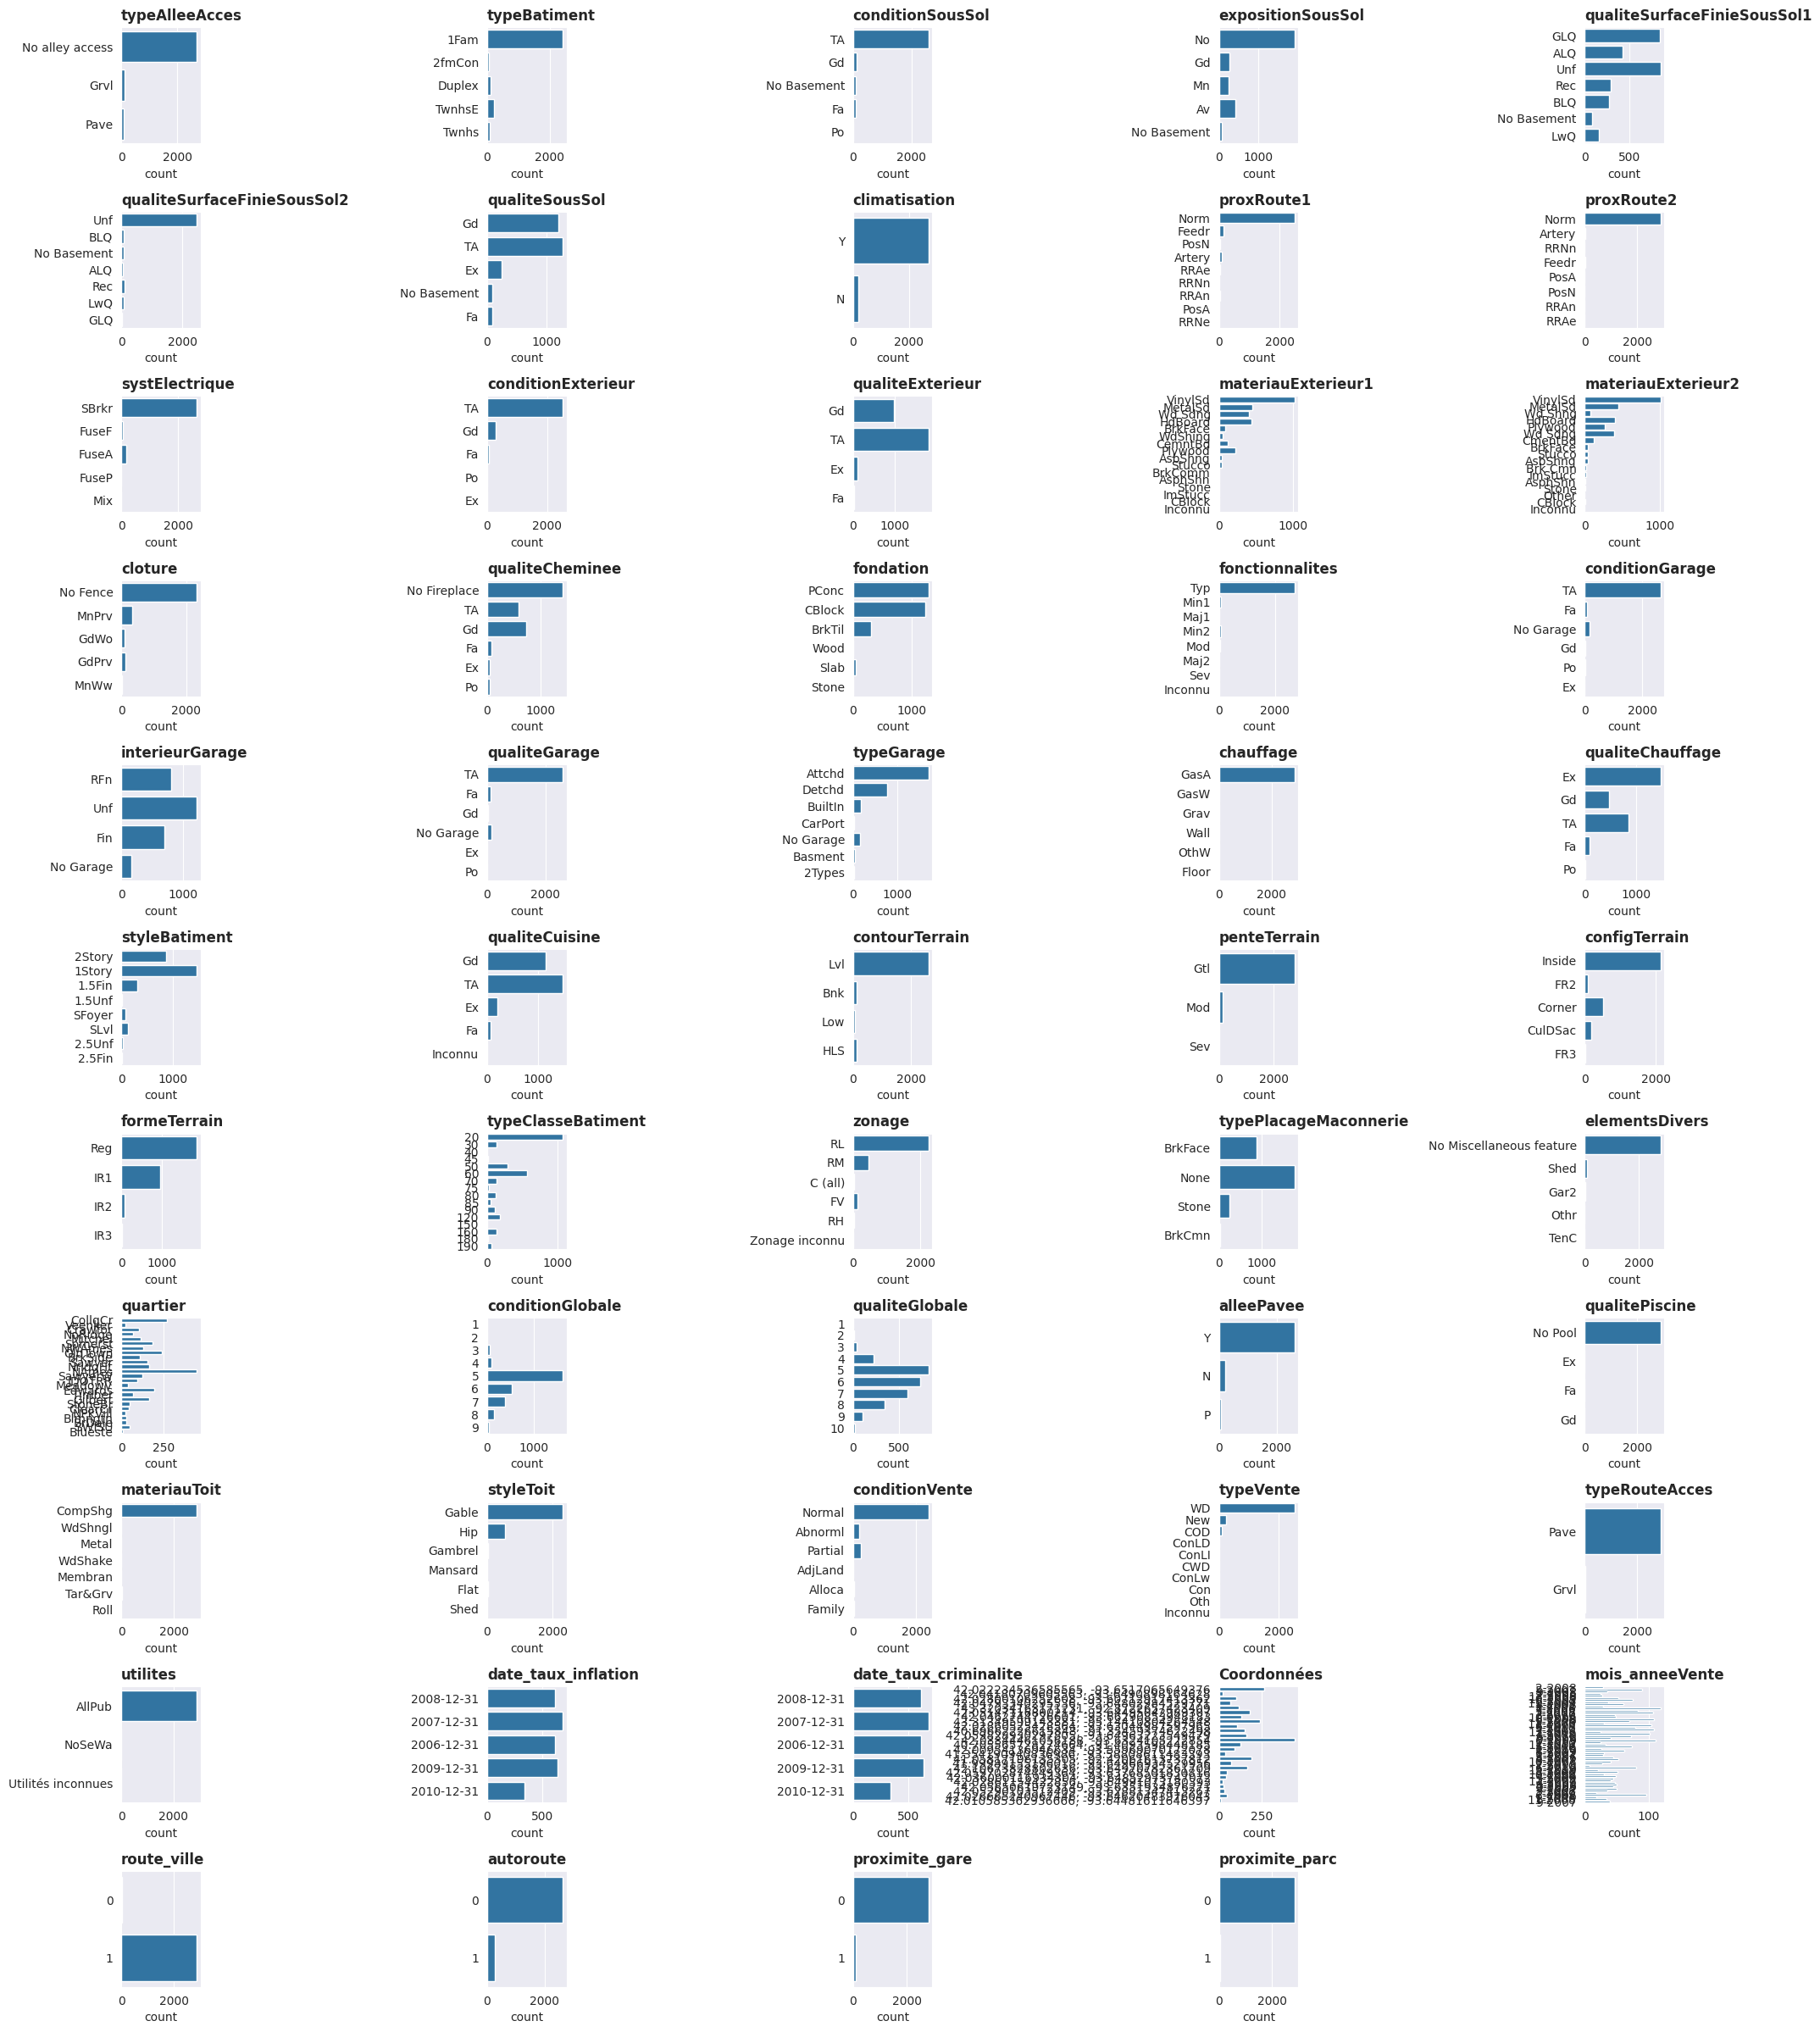

In [ ]:
# Répartition des variables catégorielles

sns.set_style('darkgrid')
plt.figure(figsize=(20,28))
for col in range(0, len(categorical)):
	plt.subplot(13,5,col+1)
	sns.countplot(data=df, y=categorical[col])
	plt.title(categorical[col], weight='bold', loc='left')
	plt.ylabel('')
plt.tight_layout()

In [ ]:
# Affichage des modalités de chaque variable catégorielle afin de déterminer lesquelles seront renommées et/ou regroupées

for col in df.select_dtypes('object', 'category') :
    print(f'{col :-<20}, {df[col].unique()}')

typeAlleeAcces------, ['No alley access' 'Grvl' 'Pave']
typeBatiment--------, ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
conditionSousSol----, ['TA' 'Gd' 'No Basement' 'Fa' 'Po']
expositionSousSol---, ['No' 'Gd' 'Mn' 'Av' 'No Basement']
qualiteSurfaceFinieSousSol1, ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
qualiteSurfaceFinieSousSol2, ['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
qualiteSousSol------, ['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
climatisation-------, ['Y' 'N']
proxRoute1----------, ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
proxRoute2----------, ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
systElectrique------, ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
conditionExterieur--, ['TA' 'Gd' 'Fa' 'Po' 'Ex']
qualiteExterieur----, ['Gd' 'TA' 'Ex' 'Fa']
materiauExterieur1--, ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'Inconnu']


In [ ]:
# Calcul de la fréquence d'apparition de chaque modalité pour chaque variable.
for col in categorical:
    print(f'{col :-<20}')
    print(df[col].value_counts())
    print('\n')

typeAlleeAcces------
No alley access    2705
Grvl                120
Pave                 78
Name: typeAlleeAcces, dtype: int64


typeBatiment--------
1Fam      2410
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      61
Name: typeBatiment, dtype: int64


conditionSousSol----
TA             2590
Gd              122
Fa              104
No Basement      82
Po                5
Name: conditionSousSol, dtype: int64


expositionSousSol---
No             1902
Av              416
Gd              264
Mn              239
No Basement      82
Name: expositionSousSol, dtype: int64


qualiteSurfaceFinieSousSol1
Unf            849
GLQ            839
ALQ            426
Rec            287
BLQ            269
LwQ            154
No Basement     79
Name: qualiteSurfaceFinieSousSol1, dtype: int64


qualiteSurfaceFinieSousSol2
Unf            2480
Rec             104
LwQ              87
No Basement      80
BLQ              67
ALQ              51
GLQ              34
Name: qualiteSurfaceFinieSousSol2, dtyp

#### Variable typeClasseBatiment

In [ ]:
# Transformation de la colonne "typeClasseBatiment" en catégorie avec les catégories et les nombres d'observations fournis
categories = {
    20: '1-ÉTAGE 1946 ET PLUS RÉCENT TOUS STYLES',
    30: '1-ÉTAGE 1945 ET PLUS ANCIEN',
    40: '1-ÉTAGE AVEC GRENIER AMÉNAGÉ TOUS ÂGES',
    45: '1-1/2 ÉTAGE - NON FINI TOUS ÂGES',
    50: '1-1/2 ÉTAGE FINI TOUS ÂGES',
    60: '2-ÉTAGES 1946 ET PLUS RÉCENT',
    70: '2-ÉTAGES 1945 ET PLUS ANCIEN',
    75: '2-1/2 ÉTAGES TOUS ÂGES',
    80: 'À PALIERS OU MULTI-NIVEAUX',
    85: 'FOYER À PALIERS',
    90: 'DUPLEX - TOUS STYLES ET ÂGES',
    120: '1-ÉTAGE PUD (Développement Unité Planifiée) - 1946 ET PLUS RÉCENT',
    150: '1-1/2 ÉTAGE PUD - TOUS ÂGES',
    160: '2-ÉTAGES PUD - 1946 ET PLUS RÉCENT',
    180: 'PUD - MULTINIVEAUX - Y COMPRIS NIVEAU DIVISÉ/FOYER',
    190: 'CONVERSION EN 2 FAMILLES - TOUS STYLES ET ÂGES'
}
df['typeClasseBatiment'] = df['typeClasseBatiment'].map(categories)

# Fonction de regroupement des modalités en fonction du nombre d'observations
def group_building_class(typeClasseBatiment):
    if typeClasseBatiment in [
        '1-ÉTAGE 1946 ET PLUS RÉCENT TOUS STYLES',
        '2-ÉTAGES 1946 ET PLUS RÉCENT',
        '1-ÉTAGE PUD (Développement Unité Planifiée) - 1946 ET PLUS RÉCENT',
        '1-1/2 ÉTAGE PUD - TOUS ÂGES',
        '2-ÉTAGES PUD - 1946 ET PLUS RÉCENT'
    ]:
        return 'Classe 1946 et plus recent'
    elif typeClasseBatiment in [
        '1-ÉTAGE 1945 ET PLUS ANCIEN',
        '2-ÉTAGES 1945 ET PLUS ANCIEN'
    ]:
        return 'Classe 1945 et plus ancien'
    else:
        return 'Classe Autre'

# Application de la fonction à la colonne typeClasseBatiment pour créer une nouvelle colonne 'typeClasseBatiment_cat'
df['typeClasseBatiment_cat'] = df['typeClasseBatiment'].apply(group_building_class)

# Remplacement de la colonne typeClasseBatiment par la nouvelle colonne 'typeClasseBatiment_cat'
df['typeClasseBatiment'] = df['typeClasseBatiment_cat']

# Suppression de la colonne temporaire 'typeClasseBatiment_cat'
df.drop('typeClasseBatiment_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'typeClasseBatiment' et du nombre d'observations pour chaque valeur
unique_values = df['typeClasseBatiment'].unique()
observations_count = df['typeClasseBatiment'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Classe 1946 et plus recent' 'Classe 1945 et plus ancien' 'Classe Autre']

Nombre observations : Classe 1946 et plus recent    1951
Classe Autre                   685
Classe 1945 et plus ancien     267
Name: typeClasseBatiment, dtype: int64


#### Variable zonage

In [ ]:
# Regroupement de la variable "zonage"
# Nous souhaitons faire la distinction entre les zones résidentielles (basse densité, autre) et non-résidentielles

'''
zonage : Identifie la classification générale de zonage de la vente.

       A     Agriculture (Agriculture)
       C     Commercial (Commercial)
       FV    Floating Village Residential (Résidentiel de Village Flottant)
       I     Industrial (Industriel)
       RH    Residential High Density (Résidentiel Haute Densité)
       RL    Residential Low Density (Résidentiel Basse Densité)
       RP    Residential Low Density Park (Résidentiel Basse Densité Parc)
       RM    Residential Medium Density (Résidentiel Moyenne Densité)
'''

#Fonction de calcul
def categorize_zoning(zoning_code):
    if zoning_code == 'RL':
        return "Basse densité"
    elif zoning_code in ['RH', 'RP', 'RM']:
        return "Haute et moyenne densité"
    else:
        return "Non résidentiel"

# Application de la fonction à la colonne zonage pour créer une nouvelle colonne 'zonage_cat'
df['zonage_cat'] = df['zonage'].apply(categorize_zoning)

# Remplacement de la colonne zonage par la nouvelle colonne 'zonage_cat'
df['zonage'] = df['zonage_cat']

# Suppression de la colonne temporaire 'zonage_cat'
df.drop('zonage_cat', axis=1, inplace=True)

unique_values = df['zonage'].unique()
observations_count = df['zonage'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Basse densité' 'Haute et moyenne densité' 'Non résidentiel']

Nombre observations : Basse densité               2249
Haute et moyenne densité     486
Non résidentiel              168
Name: zonage, dtype: int64


#### Variable typeRouteAcces

In [ ]:
'''
Street : Type d'accès routier à la propriété.

       Grvl    Gravier
       Pave    Pavé
'''
    # Fonction de regroupement des modalités en fonction du type de route
def categorize_road_type(typeRouteAcces):
    if typeRouteAcces == 'Pave':
        return "Pave"
    else:
        return "Gravier"

# Application de la fonction à la colonne typeRouteAcces pour créer une nouvelle colonne 'typeRouteAcces_cat'
df['typeRouteAcces_cat'] = df['typeRouteAcces'].apply(categorize_road_type)

# Remplacement de la colonne typeRouteAcces par la nouvelle colonne 'typeRouteAcces_cat'
df['typeRouteAcces'] = df['typeRouteAcces_cat']

# Suppression de la colonne temporaire 'typeRouteAcces_cat'
df.drop('typeRouteAcces_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'typeRouteAcces' et du nombre d'observations pour chaque valeur
unique_values = df['typeRouteAcces'].unique()
observations_count = df['typeRouteAcces'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Pave' 'Gravier']

Nombre observations : Pave       2892
Gravier      11
Name: typeRouteAcces, dtype: int64


#### Variable typeAlleeAcces

In [ ]:
# Fonction de regroupement des modalités en fonction du type d'allée
def categorize_alley_type(typeAlleeAcces):
    if typeAlleeAcces == 'Pave':
        return "Pave"
    elif typeAlleeAcces == 'Grvl':
        return "Gravier"
    else:
        return "Pas d'accès à l'allée"

# Application de la fonction à la colonne typeAlleeAcces pour créer une nouvelle colonne 'typeAlleeAcces_cat'
df['typeAlleeAcces_cat'] = df['typeAlleeAcces'].apply(categorize_alley_type)

# Remplacement de la colonne typeAlleeAcces par la nouvelle colonne 'typeAlleeAcces_cat'
df['typeAlleeAcces'] = df['typeAlleeAcces_cat']

# Suppression de la colonne temporaire 'typeAlleeAcces_cat'
df.drop('typeAlleeAcces_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'typeAlleeAcces' et du nombre d'observations pour chaque valeur
unique_values = df['typeAlleeAcces'].unique()
observations_count = df['typeAlleeAcces'].value_counts()
print("typeAlleeAcces------ :", unique_values)
print("\nNombre observations :", observations_count)

typeAlleeAcces------ : ["Pas d'accès à l'allée" 'Gravier' 'Pave']

Nombre observations : Pas d'accès à l'allée    2705
Gravier                   120
Pave                       78
Name: typeAlleeAcces, dtype: int64


#### Variable formeTerrain

In [ ]:
# Regroupement de la variable "formeTerrain"
# Nous faisons la distinction entre des formes régulières et irrégulières

'''
formeTerrain : Forme générale de la propriété.

       Reg	Regular (Régulière)
       IR1	Slightly irregular (Légèrement irrégulière)
       IR2	Moderately Irregular (Modérément irrégulière)
       IR3	Irregular (Irrégulière)
'''

def categorize_lot_shape(lot_shape_code):
    if lot_shape_code == 'Reg':
        return "Régulière"
    else:
        return "Irrégulière"

# Application de la fonction à la colonne formeTerrain pour créer une nouvelle colonne 'formeTerrain_cat'
df['formeTerrain_cat'] = df['formeTerrain'].apply(categorize_lot_shape)

# Remplacement de la colonne formeTerrain par la nouvelle colonne 'formeTerrain_cat'
df['formeTerrain'] = df['formeTerrain_cat']

# Suppression de la colonne temporaire 'formeTerrain_cat'
df.drop('formeTerrain_cat', axis=1, inplace=True)

unique_values = df['formeTerrain'].unique()
observations_count = df['formeTerrain'].value_counts()
print("Valeurs uniques :", unique_values)
print("\nNombre observations :", observations_count)

Valeurs uniques : ['Régulière' 'Irrégulière']

Nombre observations : Régulière      1856
Irrégulière    1047
Name: formeTerrain, dtype: int64


#### Variable contourTerrain

In [ ]:
'''
contourTerrain : Niveau de la propriété.

       Lvl    Plat - Presque plat/niveau
       Bnk    Incliné - Montée rapide et significative depuis le niveau de la rue jusqu'au bâtiment
       HLS    En pente - Pente significative d'un côté à l'autre
       Low    Dépression - Zone déprimée
'''
# Fonction de regroupement des modalités en fonction de la topographie du terrain
def categorize_land_contour(contourTerrain):
    if contourTerrain == 'Lvl':
        return "Plat"
    elif contourTerrain in ['Bnk', 'HLS']:
        return "En pente"
    else:
        return "Dépression"

# Application de la fonction à la colonne contourTerrain pour créer une nouvelle colonne 'contourTerrain_cat'
df['contourTerrain_cat'] = df['contourTerrain'].apply(categorize_land_contour)

# Remplacement de la colonne contourTerrain par la nouvelle colonne 'contourTerrain_cat'
df['contourTerrain'] = df['contourTerrain_cat']

# Suppression de la colonne temporaire 'contourTerrain_cat'
df.drop('contourTerrain_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'contourTerrain' et du nombre d'observations pour chaque valeur
unique_values = df['contourTerrain'].unique()
observations_count = df['contourTerrain'].value_counts()
print("contourTerrain------ :", unique_values)
print("\nNombre observations :", observations_count)

contourTerrain------ : ['Plat' 'En pente' 'Dépression']

Nombre observations : Plat          2613
En pente       233
Dépression      57
Name: contourTerrain, dtype: int64


#### Variable utilities

In [ ]:
'''
utilites : Type de services publics disponibles.

       AllPub    Toutes les utilités publiques (Électricité, Gaz, Eau et Egout)
       NoSeWa    Électricité et Gaz Seulement
'''

# Fonction de regroupement des modalités en fonction du type d'utilités disponibles
def categorize_utilities(utilites):
    if utilites == 'AllPub':
        return "Électricité, Gaz, Eau et Egout"
    else:
        return "Électricité et Gaz Seulement"

# Application de la fonction à la colonne utilites pour créer une nouvelle colonne 'utilites_cat'
df['utilites_cat'] = df['utilites'].apply(categorize_utilities)

# Remplacement de la colonne utilites par la nouvelle colonne 'utilites_cat'
df['utilites'] = df['utilites_cat']

# Suppression de la colonne temporaire 'utilites_cat'
df.drop('utilites_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'utilites' et du nombre d'observations pour chaque valeur
unique_values = df['utilites'].unique()
observations_count = df['utilites'].value_counts()
print("utilites------------ :", unique_values)
print("\nNombre observations :", observations_count)

utilites------------ : ['Électricité, Gaz, Eau et Egout' 'Électricité et Gaz Seulement']

Nombre observations : Électricité, Gaz, Eau et Egout    2900
Électricité et Gaz Seulement         3
Name: utilites, dtype: int64


#### Variable configTerrain

In [ ]:
'''
configTerrain : Configuration du terrain.

       Inside    Terrain intérieur
       Corner    Terrain en coin
       CulDSac   Terrain en cul-de-sac
       FR2       Terrain avec façade sur 2 côtés
       FR3       Terrain avec façade sur 3 côtés
'''
# Fonction de regroupement des modalités en fonction de la configuration du terrain
def categorize_lot_config(configTerrain):
    if configTerrain == 'Inside':
        return "Terrain intérieur"
    elif configTerrain == 'Corner':
        return "Terrain en coin"
    elif configTerrain == 'CulDSac':
        return "Terrain en cul-de-sac"
    elif configTerrain == 'FR2':
        return "Terrain avec façade sur plusieurs côtés"
    else:
        return "Terrain avec façade sur plusieurs côtés"

# Application de la fonction à la colonne configTerrain pour créer une nouvelle colonne 'configTerrain_cat'
df['configTerrain_cat'] = df['configTerrain'].apply(categorize_lot_config)

# Remplacement de la colonne configTerrain par la nouvelle colonne 'configTerrain_cat'
df['configTerrain'] = df['configTerrain_cat']

# Suppression de la colonne temporaire 'configTerrain_cat'
df.drop('configTerrain_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'configTerrain' et du nombre d'observations pour chaque valeur
unique_values = df['configTerrain'].unique()
observations_count = df['configTerrain'].value_counts()
print("configTerrain------- :", unique_values)
print("\nNombre observations :", observations_count)

configTerrain------- : ['Terrain intérieur' 'Terrain avec façade sur plusieurs côtés'
 'Terrain en coin' 'Terrain en cul-de-sac']

Nombre observations : Terrain intérieur                          2126
Terrain en coin                             507
Terrain en cul-de-sac                       171
Terrain avec façade sur plusieurs côtés      99
Name: configTerrain, dtype: int64


#### Variable penteTerrain

In [ ]:
'''
penteTerrain : Inclinaison du terrain.

       Gtl    Pente Douce
       Mod    Pente Modérée
       Sev    Pente Raide

'''
# Fonction de regroupement des modalités en fonction de la pente du terrain
def categorize_land_slope(penteTerrain):
    if penteTerrain == 'Gtl':
        return "Pente Douce"
    elif penteTerrain == 'Mod':
        return "Pente Modérée"
    else:
        return "Pente Raide"

# Application de la fonction à la colonne penteTerrain pour créer une nouvelle colonne 'penteTerrain_cat'
df['penteTerrain_cat'] = df['penteTerrain'].apply(categorize_land_slope)

# Remplacement de la colonne penteTerrain par la nouvelle colonne 'penteTerrain_cat'
df['penteTerrain'] = df['penteTerrain_cat']

# Suppression de la colonne temporaire 'penteTerrain_cat'
df.drop('penteTerrain_cat', axis=1, inplace=True)

# Affichage des valeurs uniques de la colonne 'penteTerrain' et du nombre d'observations pour chaque valeur
unique_values = df['penteTerrain'].unique()
observations_count = df['penteTerrain'].value_counts()
print("penteTerrain-------- :", unique_values)
print("\nNombre observations :", observations_count)

penteTerrain-------- : ['Pente Douce' 'Pente Modérée' 'Pente Raide']

Nombre observations : Pente Douce      2767
Pente Modérée     124
Pente Raide        12
Name: penteTerrain, dtype: int64


#### Variable quartier

In [ ]:
# Regroupement de la variable "quartier"
# Étant donné le grand nombre de quartiers, nous conservons les modalités qui ont plus de 70 observations, tandis que les autres sont regroupées sous la catégorie 'Autre'.
'''
quartier : Emplacements physiques dans les limites de la ville d'Ames.

       Blmngtn    Bloomington Heights
       Blueste    Bluestem
       BrDale    Briardale
       BrkSide    Brookside
       ClearCr    Clear Creek
       CollgCr    College Creek
       Crawfor    Crawford
       Edwards    Edwards
       Gilbert    Gilbert
       IDOTRR    Iowa DOT and Rail Road
       MeadowV    Meadow Village
       Mitchel    Mitchell
       NAmes    North Ames
       NoRidge    Northridge
       NPkVill    Northpark Villa
       NridgHt    Northridge Heights
       NWAmes    Northwest Ames
       OldTown    Old Town
       SWISU    South & West of Iowa State University
       Sawyer    Sawyer
       SawyerW    Sawyer West
       Somerst    Somerset
       StoneBr    Stone Brook
       Timber    Timberland
       Veenker    Veenker
'''

def categorize_neighborhood(neighborhood):
    # Liste des quartiers à garder (plus de 70 observations)
    quartiers_a_garder = ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert', 'Sawyer', 'NridgHt', 'NWAmes']

    # Renvoyer 'Autre' pour les quartiers qui ne sont pas dans la liste à garder
    return neighborhood if neighborhood in quartiers_a_garder else 'Autre quartier'

# Application de la fonction à la colonne 'quartier' pour créer une nouvelle colonne 'quartier_cat'
df['quartier_cat'] = df['quartier'].apply(categorize_neighborhood)

# Remplacement de la colonne 'quartier' par la nouvelle colonne 'quartier_cat'
df['quartier'] = df['quartier_cat']

# Suppression de la colonne temporaire 'quartier_cat'
df.drop('quartier_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'quartier'
unique_values_quartier = df['quartier'].unique()
observations_count_quartier = df['quartier'].value_counts()
print("Valeurs uniques pour 'quartier' :", unique_values_quartier)
print("\nNombre d'observations pour 'quartier' :", observations_count_quartier)

Valeurs uniques pour 'quartier' : ['CollgCr' 'Autre quartier' 'Somerst' 'NWAmes' 'OldTown' 'Sawyer'
 'NridgHt' 'NAmes' 'Edwards' 'Gilbert']

Nombre d'observations pour 'quartier' : Autre quartier    971
NAmes             443
CollgCr           267
OldTown           239
Edwards           192
Somerst           182
Gilbert           165
NridgHt           162
Sawyer            151
NWAmes            131
Name: quartier, dtype: int64


In [ ]:
# Renommange des modalités de la variable "quartier"
# Dictionnaire de correspondance entre les codes de quartier et leurs noms complets
correspondance_quartiers = {
    'NAmes': 'North Ames',
    'CollgCr': 'College Creek',
    'OldTown': 'Old Town',
    'Edwards': 'Edwards',
    'Somerst': 'Somerset',
    'Gilbert': 'Gilbert',
    'Sawyer': 'Sawyer',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames'
}

# Remplacement des codes de quartier par leurs noms complets
df['quartier'] = df['quartier'].replace(correspondance_quartiers)

# Affichage des valeurs uniques et du nombre d'observations après la transformation
unique_values_quartier = df['quartier'].unique()
observations_count_quartier = df['quartier'].value_counts()
print("Valeurs uniques pour 'quartier' après la transformation :", unique_values_quartier)
print("\nNombre d'observations pour 'quartier' après la transformation :", observations_count_quartier)

Valeurs uniques pour 'quartier' après la transformation : ['College Creek' 'Autre quartier' 'Somerset' 'Northwest Ames' 'Old Town'
 'Sawyer' 'Northridge Heights' 'North Ames' 'Edwards' 'Gilbert']

Nombre d'observations pour 'quartier' après la transformation : Autre quartier        971
North Ames            443
College Creek         267
Old Town              239
Edwards               192
Somerset              182
Gilbert               165
Northridge Heights    162
Sawyer                151
Northwest Ames        131
Name: quartier, dtype: int64


#### Variable proxRoute1

In [ ]:
# Regroupement de la variable proxRoute1
# Nous découpons cette variable en quatre catégories en fonction de la proximité avec l'autoroute, la gare et le parc, nous mettons 'norm'
## si le logement est situé à une distance raisonnable de ces trois services.


'''
proxroute : Proximité par rapport à diverses conditions

       Artery	À proximité d'une rue artérielle
       Feedr	À proximité d'une rue d'alimentation
       Norm	Normal
       RRNn	À moins de 200 pieds du chemin de fer Nord-Sud
       RRAn	Adjacent au chemin de fer Nord-Sud
       PosN	Près d'une caractéristique extérieure positive - parc, ceinture verte, etc.
       PosA	Adjacent à une caractéristique extérieure positive
       RRNe	À moins de 200 pieds du chemin de fer Est-Ouest
       RRAe	Adjacent au chemin de fer Est-Ouest
'''

def categorize_condition1(condition):
    # Liste des conditions pour chaque groupe
    normal = ['Norm']
    autoroute = ['Artery', 'Feedr']
    proximite_gare = ['RRNn', 'RRAn', 'RRNe', 'RRAe']
    proximite_parc = ['PosN', 'PosA']

    # Catégorisation des conditions
    if condition in normal:
        return 'Route ville'
    elif condition in autoroute:
        return 'Autoroute'
    elif condition in proximite_gare:
        return 'Priximité gare'
    elif condition in proximite_parc:
        return 'Proximité parc'
    else:
        return 'Route autre'

# Application de la fonction à la colonne 'proxRoute' pour créer une nouvelle colonne 'proxRoute_cat'
df['proxRoute_cat'] = df['proxRoute1'].apply(categorize_condition1)

# Remplacement de la colonne 'proxRoute' par la nouvelle colonne 'proxRoute_cat'
df['proxRoute1'] = df['proxRoute_cat']

# Suppression de la colonne temporaire 'proxRoute_cat'
df.drop('proxRoute_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'proxRoute'
unique_values_proxRoute = df['proxRoute1'].unique()
observations_count_proxRoute = df['proxRoute1'].value_counts()
print("Valeurs uniques pour 'proxRoute' après transformation :", unique_values_proxRoute)
print("\nNombre d'observations pour 'proxRoute' après transformation :", observations_count_proxRoute)

Valeurs uniques pour 'proxRoute' après transformation : ['Route ville' 'Autoroute' 'Proximité parc' 'Priximité gare']

Nombre d'observations pour 'proxRoute' après transformation : Route ville       2497
Autoroute          255
Priximité gare      93
Proximité parc      58
Name: proxRoute1, dtype: int64


#### Variable proxRoute2

In [ ]:
'''
proxRoute2 : Proximité par rapport à diverses conditions (si plus d'une est présente).

       Norm    Route ville
       Feedr   Proximité rue d'alimentation
       Artery  Proximité artère
       RRNn    Proximité chemin de fer Nord-Sud
       RRAn    Proximité chemin de fer Nord-Sud
       PosN    Proximité caractéristique positive
       PosA    Proximité caractéristique positive
       RRNe    Proximité chemin de fer Est-Ouest
       RRAe    Proximité chemin de fer Est-Ouest

'''
def categorize_condition2(condition):
    # Liste des conditions pour chaque groupe
    normal = ['Norm']
    autoroute = ['Artery', 'Feedr']
    proximite_gare = ['RRNn', 'RRAn', 'RRNe', 'RRAe']
    proximite_parc = ['PosN', 'PosA']

    # Catégorisation des conditions
    if condition in normal:
        return 'Route ville'
    elif condition in autoroute:
        return 'Autoroute'
    elif condition in proximite_gare:
        return 'Priximité gare'
    elif condition in proximite_parc:
        return 'Proximité parc'
    else:
        return 'Route autre'

# Application de la fonction à la colonne 'proxRoute2' pour créer une nouvelle colonne 'proxRoute2_cat'
df['proxRoute2_cat'] = df['proxRoute2'].apply(categorize_condition2)

# Remplacement de la colonne 'proxRoute2' par la nouvelle colonne 'proxRoute2_cat'
df['proxRoute2'] = df['proxRoute2_cat']

# Suppression de la colonne temporaire 'proxRoute2_cat'
df.drop('proxRoute2_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'proxRoute2'
unique_values_proxRoute2 = df['proxRoute2'].unique()
observations_count_proxRoute2 = df['proxRoute2'].value_counts()
print("Valeurs uniques pour 'proxRoute2' après transformation :", unique_values_proxRoute2)
print("\nNombre d'observations pour 'proxRoute2' après transformation :", observations_count_proxRoute2)

Valeurs uniques pour 'proxRoute2' après transformation : ['Route ville' 'Autoroute' 'Priximité gare' 'Proximité parc']

Nombre d'observations pour 'proxRoute2' après transformation : Route ville       2874
Autoroute           18
Proximité parc       7
Priximité gare       4
Name: proxRoute2, dtype: int64


#### Variable typeBatiment

In [ ]:
# Regroupement de la variable "typeBatiment"
# Nous découpons cette variable en trois catégories en fonction de la taille du batiment
'''
typeBatiment : Type de logement.

       1Fam    Single-family Detached (Détaché unifamilial)
       2FmCon  Two-family Conversion; originally built as one-family dwelling (Conversion bifamiliale ; à l'origine construit comme une habitation unifamiliale)
       Duplx   Duplex (Duplex)
       TwnhsE  Townhouse End Unit (Maison de ville - Unité d'extrémité)
       TwnhsI  Townhouse Inside Unit (Maison de ville - Unité intérieure)
'''

def categorize_building_type(building_type):
    if building_type == '1Fam':
        return 'Unifamilial'
    elif building_type in ['Duplex', '2fmCon']:
        return 'Duplex'
    else:
        return 'Autre Type Batiment'

# Application de la fonction à la colonne 'typeBatiment' pour créer une nouvelle colonne 'typeBatiment_cat'
df['typeBatiment_cat'] = df['typeBatiment'].apply(categorize_building_type)

# Remplacement de la colonne 'typeBatiment' par la nouvelle colonne 'typeBatiment_cat'
df['typeBatiment'] = df['typeBatiment_cat']

# Suppression de la colonne temporaire 'typeBatiment_cat'
df.drop('typeBatiment_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'typeBatiment'
unique_values_type_batiment = df['typeBatiment'].unique()
observations_count_type_batiment = df['typeBatiment'].value_counts()
print("Valeurs uniques pour 'typeBatiment' :", unique_values_type_batiment)
print("\nNombre d'observations pour 'typeBatiment' :", observations_count_type_batiment)

Valeurs uniques pour 'typeBatiment' : ['Unifamilial' 'Duplex' 'Autre Type Batiment']

Nombre d'observations pour 'typeBatiment' : Unifamilial            2410
Autre Type Batiment     323
Duplex                  170
Name: typeBatiment, dtype: int64


#### Variable styleBatiment

In [ ]:
# Regroupement de la variable 'styleBatiment'
# Nouvelles catégories : '1Story', '2Story', '1.5Story', 'Split', 'Autre'

'''
HouseStyle: Style du bâtiment

1Story - Un étage
1.5Fin - Un étage et demi : 2e niveau aménagé
1.5Unf - Un étage et demi : 2e niveau non aménagé
2Story - Deux étages
2.5Fin - Deux étages et demi : 2e niveau aménagé
2.5Unf - Deux étages et demi : 2e niveau non aménagé
SFoyer - Entrée divisée (Split Foyer)
SLvl - Niveau divisé (Split Level)

'''

def categorize_house_style(style):
    if style == '1Story':
        return 'Bat 1 Etage'
    elif style in ['2.5Unf', '2Story', '2.5Story']:
        return 'Bat 2 Etages'
    elif style in ['1.5Fin', '1.5Unf']:
        return 'Bat 1.5 Etage'
    elif style in ['SLvl', 'SFoyer']:
        return 'Bat Divisé'
    else :
        return 'Autres'

df['styleBatiment_cat'] = df['styleBatiment'].apply(categorize_house_style)
df['styleBatiment'] = df['styleBatiment_cat']
df.drop('styleBatiment_cat', axis=1, inplace=True)

unique_values_styleBatiment = df['styleBatiment'].unique()
observations_count_styleBatiment = df['styleBatiment'].value_counts()
print("Valeurs uniques pour 'styleBatiment' :", unique_values_styleBatiment)
print("\nNombre d'observations pour 'styleBatiment' :", observations_count_styleBatiment)

Valeurs uniques pour 'styleBatiment' : ['Bat 2 Etages' 'Bat 1 Etage' 'Bat 1.5 Etage' 'Bat Divisé' 'Autres']

Nombre d'observations pour 'styleBatiment' : Bat 1 Etage      1466
Bat 2 Etages      887
Bat 1.5 Etage     331
Bat Divisé        211
Autres              8
Name: styleBatiment, dtype: int64


#### Variable styleToit

In [ ]:
# Regroupement de la variable 'styleToit'

'''
RoofStyle: Type de toit

- Flat - Plat
- Gable - À pignon
- Gambrel - À deux versants égaux (style de grange)
- Hip - À quatre versants (pyramidal)
- Mansard - À mansarde
- Shed - À pente unique (appentis)

'''

# Définition de la fonction de regroupement
def categorize_roof_style(style):
    if style == 'Gable':
        return 'Toit à pignon'
    elif style == 'Hip':
        return 'Toit pyramidal'
    else:
        return 'Toit autre'

# Application de la fonction à la colonne 'styleToit' pour créer une nouvelle colonne 'styleToit_cat'
df['styleToit_cat'] = df['styleToit'].apply(categorize_roof_style)

# Remplacement de la colonne 'styleToit' par la nouvelle colonne 'styleToit_cat'
df['styleToit'] = df['styleToit_cat']

# Suppression de la colonne temporaire 'styleToit_cat'
df.drop('styleToit_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'styleToit'
unique_values_style_toit = df['styleToit'].unique()
observations_count_style_toit = df['styleToit'].value_counts()
print("Valeurs uniques pour 'styleToit' :", unique_values_style_toit)
print("\nNombre d'observations pour 'styleToit' :", observations_count_style_toit)

Valeurs uniques pour 'styleToit' : ['Toit à pignon' 'Toit pyramidal' 'Toit autre']

Nombre d'observations pour 'styleToit' : Toit à pignon     2306
Toit pyramidal     539
Toit autre          58
Name: styleToit, dtype: int64


#### Variable materiauToit

In [ ]:
'''
materiauToit : Matériau de toiture.

       CompShg    Bardeau composite
       Tar&Grv    Gravier & Goudron
       WdShngl    Bardeaux de bois
       WdShake    Bardeaux de bois agité
       Metal      Métal
       Membran    Membrane
       Roll       Rouleau
       ClyTile    Argile

'''
# Fonction de regroupement des matériaux de toiture
def categorize_roof_material(material):
    # Liste des matériaux de toiture pour chaque groupe
    argile = ['ClyTile']
    bardeau_composite = ['CompShg']
    membrane = ['Membran']
    metal = ['Metal']
    rouleau = ['Roll']
    gravier_goudron = ['Tar&Grv']
    bardeaux_bois_agite = ['WdShake']
    bardeaux_bois = ['WdShngl']

    # Catégorisation des matériaux de toiture
    if material in bardeau_composite:
        return 'Bardeau composite'
    else:
        return 'Matériau autre'

# Application de la fonction à la colonne 'materiauToit' pour créer une nouvelle colonne 'materiauToit_cat'
df['materiauToit_cat'] = df['materiauToit'].apply(categorize_roof_material)

# Remplacement de la colonne 'materiauToit' par la nouvelle colonne 'materiauToit_cat'
df['materiauToit'] = df['materiauToit_cat']

# Suppression de la colonne temporaire 'materiauToit_cat'
df.drop('materiauToit_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'materiauToit'
unique_values_materiauToit = df['materiauToit'].unique()
observations_count_materiauToit = df['materiauToit'].value_counts()
print("Valeurs uniques pour 'materiauToit' après transformation :", unique_values_materiauToit)
print("\nNombre d'observations pour 'materiauToit' après transformation :", observations_count_materiauToit)

Valeurs uniques pour 'materiauToit' après transformation : ['Bardeau composite' 'Matériau autre']

Nombre d'observations pour 'materiauToit' après transformation : Bardeau composite    2862
Matériau autre         41
Name: materiauToit, dtype: int64


#### Variable materiauExterieur1

In [ ]:
# Regroupement de la variable 'extRevetement'

'''
Exterior1st: Revêtement extérieur de la maison

       AsbShng	Bardeaux d'amiante
       AsphShn	Bardeaux d'asphalte
       BrkComm	Brique commune
       BrkFace	Façade en briques
       CBlock	Bloc de ciment
       CemntBd	Panneau de ciment
       HdBoard	Panneau dur
       ImStucc	Stuc imitation
       MetalSd	Revêtement métallique
       Other	Autre
       Plywood	Contreplaqué
       PreCast	Préfabriqué
       Stone	Pierre
       Stucco	Stuc
       VinylSd	Revêtement en vinyle
       Wd Sdng	Revêtement en bois
       WdShing	Bardeaux en bois
'''

# Définition de la fonction de regroupement
def categorize_exterior(exterior):
    if exterior == 'VinylSd':
        return 'Vinyle'
    elif exterior == 'MetalSd':
        return 'Métal'
    elif exterior == 'HdBoard':
        return 'Panneau dur'
    elif exterior == 'Wd Sdng':
        return 'Bois'
    elif exterior == 'Plywood':
        return 'Contreplaqué'
    else:
        return 'Autre matériau extérieur'

# Renommer la colonne 'extRevetement' avec les nouveaux noms
df['materiauExterieur1'] = df['materiauExterieur1'].map(categorize_exterior)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'extRevetement'
unique_values_ext_revetement = df['materiauExterieur1'].unique()
observations_count_ext_revetement = df['materiauExterieur1'].value_counts()
print("Valeurs uniques pour 'materiauExterieur1' :", unique_values_ext_revetement)
print("\nNombre d'observations pour 'materiauExterieur1' :", observations_count_ext_revetement)

Valeurs uniques pour 'materiauExterieur1' : ['Vinyle' 'Métal' 'Bois' 'Panneau dur' 'Autre matériau extérieur'
 'Contreplaqué']

Nombre d'observations pour 'materiauExterieur1' : Vinyle                      1020
Métal                        450
Panneau dur                  440
Bois                         409
Autre matériau extérieur     365
Contreplaqué                 219
Name: materiauExterieur1, dtype: int64


#### Variable materiauExterieur2

In [ ]:
'''
materiauExterieur2 : Revêtement extérieur de la maison (si plus d'un matériau).

       VinylSd      Vinyle
       MetalSd      Métal
       HdBoard      Panneau dur
       Wd Sdng      Bois
       Plywood      Contreplaqué
       Autre        Autre matériau extérieur

'''

# Définition de la fonction de regroupement
def categorize_exterior2(exterior):
    if exterior == 'VinylSd':
        return 'Vinyle'
    elif exterior == 'MetalSd':
        return 'Métal'
    elif exterior == 'HdBoard':
        return 'Panneau dur'
    elif exterior == 'Wd Sdng':
        return 'Bois'
    elif exterior == 'Plywood':
        return 'Contreplaqué'
    else:
        return 'Autre matériau extérieur  2'

# Application de la fonction à la colonne 'materiauExterieur2' pour créer une nouvelle colonne 'materiauExterieur2_cat'
df['materiauExterieur2_cat'] = df['materiauExterieur2'].apply(categorize_exterior2)

# Remplacement de la colonne 'materiauExterieur2' par la nouvelle colonne 'materiauExterieur2_cat'
df['materiauExterieur2'] = df['materiauExterieur2_cat']

# Suppression de la colonne temporaire 'materiauExterieur2_cat'
df.drop('materiauExterieur2_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'materiauExterieur2'
unique_values_materiauExterieur2 = df['materiauExterieur2'].unique()
observations_count_materiauExterieur2 = df['materiauExterieur2'].value_counts()
print("Valeurs uniques pour 'materiauExterieur2' :", unique_values_materiauExterieur2)
print("\nNombre d'observations pour 'materiauExterieur2' :", observations_count_materiauExterieur2)

Valeurs uniques pour 'materiauExterieur2' : ['Vinyle' 'Métal' 'Autre matériau extérieur  2' 'Panneau dur'
 'Contreplaqué' 'Bois']

Nombre d'observations pour 'materiauExterieur2' : Vinyle                         1009
Métal                           447
Panneau dur                     403
Bois                            391
Autre matériau extérieur  2     385
Contreplaqué                    268
Name: materiauExterieur2, dtype: int64


#### Variable typePlacageMaconnerie

In [ ]:
# Regroupement de la variable 'typePlacageMaconnerie'
'''
MasVnrType: Type de placage en pierre

       BrkCmn	Brique commune
       BrkFace	Façade en briques
       CBlock	Bloc de ciment
       None	Aucun
       Stone	Pierre
'''

df['typePlacageMaconnerie'].replace({'BrkFace': 'Placage brique',
                                     'BrkCmn': 'Placage brique',
                                     'Stone': 'Placage pierre',
                                     'None': 'Aucun placage'}, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'typePlacage'
unique_values_type_placage = df['typePlacageMaconnerie'].unique()
observations_count_type_placage = df['typePlacageMaconnerie'].value_counts()
print("Valeurs uniques pour 'typePlacageMaconnerie' :", unique_values_type_placage)
print("\nNombre d'observations pour 'typePlacageMaconnerie' :", observations_count_type_placage)

Valeurs uniques pour 'typePlacageMaconnerie' : ['Placage brique' 'Aucun placage' 'Placage pierre']

Nombre d'observations pour 'typePlacageMaconnerie' : Aucun placage     1763
Placage brique     900
Placage pierre     240
Name: typePlacageMaconnerie, dtype: int64


#### Variable qualiteExterieur

In [ ]:
# Regroupement de la variable 'qualiteExterieur'
'''
qualiteExterieur : Évalue la qualité du matériau à l'extérieur de la maison.

       Ex	Excellent
       Gd	Bon
       TA	Moyenne/Typique
       Fa	Mauvaise
       Po	Faible
'''

# Fonction de regroupement pour 'qualiteExterieur'
def categorize_exterior_quality(quality):
    if quality == 'TA':
        return 'Qualité moyenne'
    elif quality == 'Gd':
        return 'Qualité bonne'
    elif quality == 'Ex':
        return 'Qualité excellente'
    elif quality == 'Fa':
        return 'Qualité faible'
    elif quality == 'Po':
        return 'Qualité faible'
    else:
        return 'Autre qualité'

# Application de la fonction à la colonne 'qualiteExterieur' pour créer une nouvelle colonne 'qualiteExterieur_cat'
df['qualiteExterieur_cat'] = df['qualiteExterieur'].apply(categorize_exterior_quality)

# Remplacement de la colonne 'qualiteExterieur' par la nouvelle colonne 'qualiteExterieur_cat'
df['qualiteExterieur'] = df['qualiteExterieur_cat']

# Suppression de la colonne temporaire 'qualiteExterieur_cat'
df.drop('qualiteExterieur_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteExterieur'
unique_values_qualiteExterieur = df['qualiteExterieur'].unique()
observations_count_qualiteExterieur = df['qualiteExterieur'].value_counts()
print("Valeurs uniques pour 'qualiteExterieur' :", unique_values_qualiteExterieur)
print("\nNombre d'observations pour 'qualiteExterieur' :", observations_count_qualiteExterieur)

Valeurs uniques pour 'qualiteExterieur' : ['Qualité bonne' 'Qualité moyenne' 'Qualité excellente' 'Qualité faible']

Nombre d'observations pour 'qualiteExterieur' : Qualité moyenne       1795
Qualité bonne          975
Qualité excellente      98
Qualité faible          35
Name: qualiteExterieur, dtype: int64


#### Variable conditionExterieur

In [ ]:
# Regroupement de la variable 'conditionExterieur'
'''
conditionExterieur : Évalue l'état actuel du matériau à l'extérieur

       Ex	Excellent
       Gd	Bon
       TA	Moyen/Typique
       Fa	Mauvais
       Po	Faible
'''
# Regroupement de la variable "qualiteExt"
def categorise_exteriour_quality(quality):
    if quality == 'TA':
        return 'Qualité moyenne'
    elif quality == 'Gd':
        return 'Qualité bonne'
    elif quality == 'Ex':
        return 'Qualité bonne'
    elif quality == 'Fa':
        return 'Rénovation recommandée'
    elif quality == 'Po':
        return 'Rénovation recommandée'
    else:
        return 'Qualité autre'

df['qualiteExt_cat'] = df['conditionExterieur'].apply(categorise_exteriour_quality)
df['conditionExterieur'] = df['qualiteExt_cat']
df.drop('qualiteExt_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteExt'
unique_values_qualiteExt = df['conditionExterieur'].unique()
observations_count_qualiteExt = df['conditionExterieur'].value_counts()
print("Valeurs uniques pour 'conditionExterieur' :", unique_values_qualiteExt)
print("\nNombre d'observations pour 'conditionExterieur' :", observations_count_qualiteExt)

Valeurs uniques pour 'conditionExterieur' : ['Qualité moyenne' 'Qualité bonne' 'Rénovation recommandée']

Nombre d'observations pour 'conditionExterieur' : Qualité moyenne           2523
Qualité bonne              310
Rénovation recommandée      70
Name: conditionExterieur, dtype: int64


#### Variable fondation

In [ ]:
# Regroupement de la variable "fondation"
# Nous gardons les types de fondation PConc, CBlock, BrkTil et on regroupe les autres sous "Autre"

'''
fondation: Type de fondation

       BrkTil	Brique et carrelage
       CBlock	Bloc de ciment
       PConc	Béton coulé
       Slab	Dalle
       Stone	Pierre
       Wood	Bois

'''

def categorize_foundation(foundation_type):
    correspondance_noms_fondation = {
        'PConc': 'Fondation Béton',
        'CBlock': 'Fondation Ciment',
        'BrkTil': 'Fondation Brique',
        'Autre': 'Fondation Autre'
    }

    if foundation_type in correspondance_noms_fondation:
        return correspondance_noms_fondation[foundation_type]
    else:
        return correspondance_noms_fondation['Autre']

df['fondation_cat'] = df['fondation'].apply(categorize_foundation)
df['fondation'] = df['fondation_cat']
df.drop('fondation_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'fondation'
unique_values_fondation = df['fondation'].unique()
observations_count_fondation = df['fondation'].value_counts()
print("Valeurs uniques pour 'fondation' :", unique_values_fondation)
print("\nNombre d'observations pour 'fondation' :", observations_count_fondation)

Valeurs uniques pour 'fondation' : ['Fondation Béton' 'Fondation Ciment' 'Fondation Brique' 'Fondation Autre']

Nombre d'observations pour 'fondation' : Fondation Béton     1296
Fondation Ciment    1231
Fondation Brique     311
Fondation Autre       65
Name: fondation, dtype: int64


#### Variable qualiteSousSol

In [ ]:
# Renommage des modalités de la variable "qualiteSousSol"
correspondance_noms_qualiteSs = {
    'Ex': 'Hauteur sous-sol > 2.5 m',
    'Gd': 'Hauteur sous-sol 2.3 - 2.5 m',
    'TA': 'Hauteur sous-sol 2 - 2.2 m',
    'Fa': 'Hauteur sous-sol 1.7 - 2 m',
    'Po': 'Hauteur sous-sol < 1.7 m',
    'No Basement': 'Pas de sous-sol'
}

df['hauteurSs'] = df['qualiteSousSol'].map(correspondance_noms_qualiteSs)

# Suppression de l'ancienne colonne 'qualiteSousSol'
df.drop('qualiteSousSol', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'hauteurSs'
unique_values_hauteurSs = df['hauteurSs'].unique()
observations_count_hauteurSs = df['hauteurSs'].value_counts()
print("Valeurs uniques pour 'hauteurSs' :", unique_values_hauteurSs)
print("\nNombre d'observations pour 'hauteurSs' :", observations_count_hauteurSs)

Valeurs uniques pour 'hauteurSs' : ['Hauteur sous-sol 2.3 - 2.5 m' 'Hauteur sous-sol 2 - 2.2 m'
 'Hauteur sous-sol > 2.5 m' 'Pas de sous-sol' 'Hauteur sous-sol 1.7 - 2 m']

Nombre d'observations pour 'hauteurSs' : Hauteur sous-sol 2 - 2.2 m      1282
Hauteur sous-sol 2.3 - 2.5 m    1205
Hauteur sous-sol > 2.5 m         247
Hauteur sous-sol 1.7 - 2 m        88
Pas de sous-sol                   81
Name: hauteurSs, dtype: int64


#### Variable conditionSs

In [ ]:
# Regroupement de la varaible conditionSs
'''
conditionSousSo: Évalue l'état général du sous-sol

       Ex	Excellent
       Gd	Bon
       TA	Typique - légère humidité autorisée
       Fa	Faible - humidité ou quelques fissures ou tassements
       Po	Pauvre - Fissures graves, tassements ou humidité importante
       NA	Pas de sous-sol

'''
# Renommer les classes 'Fa' et 'Po' en 'Médiocre', 'TA' en 'Typique' et 'Gd' en 'Bon'
df['conditionSousSol'].replace({'Fa': 'Condition Ss à rénover',
                           'Po': 'Condition Ss à rénover',
                           'TA': 'Condition Ss Bonne',
                           'Gd': 'Condition Ss Bonne',
                            'No Basement': 'Pas de sous-sol'}, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'conditionSs'
unique_values_conditionSs = df['conditionSousSol'].unique()
observations_count_conditionSs = df['conditionSousSol'].value_counts()
print("Valeurs uniques pour 'conditionSousSol' :", unique_values_conditionSs)
print("\nNombre d'observations pour 'conditionSousSol' :", observations_count_conditionSs)


Valeurs uniques pour 'conditionSousSol' : ['Condition Ss Bonne' 'Pas de sous-sol' 'Condition Ss à rénover']

Nombre d'observations pour 'conditionSousSol' : Condition Ss Bonne        2712
Condition Ss à rénover     109
Pas de sous-sol             82
Name: conditionSousSol, dtype: int64


#### Variable expositionSousSol

In [ ]:
# Regroupement de la variable 'expositionSousSol'
'''
expositionSousSol : Réfère aux murs de niveau de jardin ou de sous-sol

       Gd	Bonne exposition
       Av	Exposition moyenne (les niveaux divisés ou les vestibules ont généralement une exposition moyenne ou supérieure)
       Mn	Exposition minimale
       No	Aucune exposition
       NA	Aucun sous-sol
'''

# Fonction de regroupement pour 'expositionSousSol'
def categorize_basement_exposure(exposure):
    if exposure == 'Gd':
        return 'Bonne exposition'
    elif exposure == 'Av':
        return 'Exposition moyenne'
    elif exposure == 'Mn':
        return 'Exposition minimale'
    elif exposure == 'No':
        return 'Aucune exposition'
    elif exposure == 'No Basement':
        return 'Aucun sous-sol'
    else:
        return 'Autre exposition'

# Application de la fonction à la colonne 'expositionSousSol' pour créer une nouvelle colonne 'expositionSousSol_cat'
df['expositionSousSol_cat'] = df['expositionSousSol'].apply(categorize_basement_exposure)

# Remplacement de la colonne 'expositionSousSol' par la nouvelle colonne 'expositionSousSol_cat'
df['expositionSousSol'] = df['expositionSousSol_cat']

# Suppression de la colonne temporaire 'expositionSousSol_cat'
df.drop('expositionSousSol_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'expositionSousSol'
unique_values_expositionSousSol = df['expositionSousSol'].unique()
observations_count_expositionSousSol = df['expositionSousSol'].value_counts()
print("Valeurs uniques pour 'expositionSousSol' :", unique_values_expositionSousSol)
print("\nNombre d'observations pour 'expositionSousSol' :", observations_count_expositionSousSol)

Valeurs uniques pour 'expositionSousSol' : ['Aucune exposition' 'Bonne exposition' 'Exposition minimale'
 'Exposition moyenne' 'Aucun sous-sol']

Nombre d'observations pour 'expositionSousSol' : Aucune exposition      1902
Exposition moyenne      416
Bonne exposition        264
Exposition minimale     239
Aucun sous-sol           82
Name: expositionSousSol, dtype: int64


#### Variable qualiteSurfaceFinieSousSol1

In [ ]:
# Regroupement de la variable 'qualiteSurfaceFinieSousSol1'
'''
qualiteSurfaceFinieSousSol1 : Évaluation de la qualité de la zone finie du sous-sol

       GLQ	Bonne qualité de vie
       ALQ	Quartiers de vie moyenne
       BLQ	Quartiers de vie sous la moyenne
       Rec	Salle de récréation moyenne
       LwQ	Faible qualité
       Unf	Non fini
       NA	Aucun sous-sol
'''

# Fonction de regroupement pour 'qualiteSurfaceFinieSousSol1'
def categorize_basement_finished_type(type):
    if type == 'GLQ':
        return 'Bonne qualité de vie'
    elif type == 'ALQ':
        return 'Quartiers de vie moyenne'
    elif type == 'BLQ':
        return 'Quartiers de vie sous la moyenne'
    elif type == 'Rec':
        return 'Salle de récréation moyenne'
    elif type == 'LwQ':
        return 'Faible qualité'
    elif type == 'Unf':
        return 'Non fini'
    elif type == 'No Basement':
        return 'Aucun sous-sol'
    else:
        return 'Autre qualité'

# Application de la fonction à la colonne 'qualiteSurfaceFinieSousSol1' pour créer une nouvelle colonne 'qualiteSurfaceFinieSousSol1_cat'
df['qualiteSurfaceFinieSousSol1_cat'] = df['qualiteSurfaceFinieSousSol1'].apply(categorize_basement_finished_type)

# Remplacement de la colonne 'qualiteSurfaceFinieSousSol1' par la nouvelle colonne 'qualiteSurfaceFinieSousSol1_cat'
df['qualiteSurfaceFinieSousSol1'] = df['qualiteSurfaceFinieSousSol1_cat']

# Suppression de la colonne temporaire 'qualiteSurfaceFinieSousSol1_cat'
df.drop('qualiteSurfaceFinieSousSol1_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteSurfaceFinieSousSol1'
unique_values_qualiteSurfaceFinieSousSol1 = df['qualiteSurfaceFinieSousSol1'].unique()
observations_count_qualiteSurfaceFinieSousSol1 = df['qualiteSurfaceFinieSousSol1'].value_counts()
print("Valeurs uniques pour 'qualiteSurfaceFinieSousSol1' :", unique_values_qualiteSurfaceFinieSousSol1)
print("\nNombre d'observations pour 'qualiteSurfaceFinieSousSol1' :", observations_count_qualiteSurfaceFinieSousSol1)

Valeurs uniques pour 'qualiteSurfaceFinieSousSol1' : ['Bonne qualité de vie' 'Quartiers de vie moyenne' 'Non fini'
 'Salle de récréation moyenne' 'Quartiers de vie sous la moyenne'
 'Aucun sous-sol' 'Faible qualité']

Nombre d'observations pour 'qualiteSurfaceFinieSousSol1' : Non fini                            849
Bonne qualité de vie                839
Quartiers de vie moyenne            426
Salle de récréation moyenne         287
Quartiers de vie sous la moyenne    269
Faible qualité                      154
Aucun sous-sol                       79
Name: qualiteSurfaceFinieSousSol1, dtype: int64


#### Variable qualiteSurfaceFinieSousSol2

In [ ]:
# Regroupement de la variable 'qualiteSurfaceFinieSousSol2'
'''
qualiteSurfaceFinieSousSol2 : Évaluation de la qualité de la deuxième zone finie du sous-sol (si plusieurs types)

       GLQ	Bonne qualité de vie
       ALQ	Quartiers de vie moyenne
       BLQ	Quartiers de vie sous la moyenne
       Rec	Salle de récréation moyenne
       LwQ	Faible qualité
       Unf	Non fini
       NA	Aucun sous-sol
'''

# Fonction de regroupement pour 'qualiteSurfaceFinieSousSol2'
def categorize_basement_finished_type_2(type):
    if type == 'GLQ':
        return 'Bonne qualité de vie'
    elif type == 'ALQ':
        return 'Quartiers de vie moyenne'
    elif type == 'BLQ':
        return 'Quartiers de vie sous la moyenne'
    elif type == 'Rec':
        return 'Salle de récréation moyenne'
    elif type == 'LwQ':
        return 'Faible qualité'
    elif type == 'Unf':
        return 'Non fini'
    elif type == 'No Basement':
        return 'Aucun sous-sol'
    else:
        return 'Autre qualité'

# Application de la fonction à la colonne 'qualiteSurfaceFinieSousSol2' pour créer une nouvelle colonne 'qualiteSurfaceFinieSousSol2_cat'
df['qualiteSurfaceFinieSousSol2_cat'] = df['qualiteSurfaceFinieSousSol2'].apply(categorize_basement_finished_type_2)

# Remplacement de la colonne 'qualiteSurfaceFinieSousSol2' par la nouvelle colonne 'qualiteSurfaceFinieSousSol2_cat'
df['qualiteSurfaceFinieSousSol2'] = df['qualiteSurfaceFinieSousSol2_cat']

# Suppression de la colonne temporaire 'qualiteSurfaceFinieSousSol2_cat'
df.drop('qualiteSurfaceFinieSousSol2_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteSurfaceFinieSousSol2'
unique_values_qualiteSurfaceFinieSousSol2 = df['qualiteSurfaceFinieSousSol2'].unique()
observations_count_qualiteSurfaceFinieSousSol2 = df['qualiteSurfaceFinieSousSol2'].value_counts()
print("Valeurs uniques pour 'qualiteSurfaceFinieSousSol2' :", unique_values_qualiteSurfaceFinieSousSol2)
print("\nNombre d'observations pour 'qualiteSurfaceFinieSousSol2' :", observations_count_qualiteSurfaceFinieSousSol2)

Valeurs uniques pour 'qualiteSurfaceFinieSousSol2' : ['Non fini' 'Quartiers de vie sous la moyenne' 'Aucun sous-sol'
 'Quartiers de vie moyenne' 'Salle de récréation moyenne' 'Faible qualité'
 'Bonne qualité de vie']

Nombre d'observations pour 'qualiteSurfaceFinieSousSol2' : Non fini                            2480
Salle de récréation moyenne          104
Faible qualité                        87
Aucun sous-sol                        80
Quartiers de vie sous la moyenne      67
Quartiers de vie moyenne              51
Bonne qualité de vie                  34
Name: qualiteSurfaceFinieSousSol2, dtype: int64


#### Variable chauffage

In [ ]:
# Regroupement de la varaible chauffage
'''
chauffage: Type de chauffage

       Floor	Plancher chauffant
       GasA	Chauffage à air pulsé au gaz
       GasW	Chauffage à eau chaude ou à vapeur au gaz
       Grav	Four à gravité
       OthW	Chauffage à eau chaude ou à vapeur autre que le gaz
       Wall	Four mural

'''

# Remplacer la colonne 'chauffage' par une version catégorisée
df['chauffage'] = df['chauffage'].map({'GasA': 'Chauffage air pulsé',
                                       'GasW': 'Chauffage eau chaude ou vapeur'}).fillna('Chauffage Autre')

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'chauffage'
unique_values_chauffage = df['chauffage'].unique()
observations_count_chauffage = df['chauffage'].value_counts()
print("Valeurs uniques pour 'chauffage' :", unique_values_chauffage)
print("\nNombre d'observations pour 'chauffage' :", observations_count_chauffage)

Valeurs uniques pour 'chauffage' : ['Chauffage air pulsé' 'Chauffage eau chaude ou vapeur' 'Chauffage Autre']

Nombre d'observations pour 'chauffage' : Chauffage air pulsé               2859
Chauffage eau chaude ou vapeur      26
Chauffage Autre                     18
Name: chauffage, dtype: int64


#### Variable qualiteChauffage

In [ ]:
# Regroupement de la variable 'qualiteChauffage'
'''
qualiteChauffage : Qualité et état du chauffage

       Ex	Excellent
       Gd	Bon
       TA	Moyen/Typique
       Fa	Mauvais
       Po	Faible
'''

# Fonction de regroupement pour 'qualiteChauffage'
def categorize_heating_quality_condition(quality):
    if quality == 'Ex':
        return 'Excellent'
    elif quality == 'Gd':
        return 'Bon'
    elif quality == 'TA':
        return 'Moyen/Typique'
    elif quality == 'Fa':
        return 'Mauvais'
    elif quality == 'Po':
        return 'Faible'
    else:
        return 'Autre qualité'

# Application de la fonction à la colonne 'qualiteChauffage' pour créer une nouvelle colonne 'qualiteChauffage_cat'
df['qualiteChauffage_cat'] = df['qualiteChauffage'].apply(categorize_heating_quality_condition)

# Remplacement de la colonne 'qualiteChauffage' par la nouvelle colonne 'qualiteChauffage_cat'
df['qualiteChauffage'] = df['qualiteChauffage_cat']

# Suppression de la colonne temporaire 'qualiteChauffage_cat'
df.drop('qualiteChauffage_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteChauffage'
unique_values_qualiteChauffage = df['qualiteChauffage'].unique()
observations_count_qualiteChauffage = df['qualiteChauffage'].value_counts()
print("Valeurs uniques pour 'qualiteChauffage' :", unique_values_qualiteChauffage)
print("\nNombre d'observations pour 'qualiteChauffage' :", observations_count_qualiteChauffage)

Valeurs uniques pour 'qualiteChauffage' : ['Excellent' 'Bon' 'Moyen/Typique' 'Mauvais' 'Faible']

Nombre d'observations pour 'qualiteChauffage' : Excellent        1480
Moyen/Typique     855
Bon               473
Mauvais            92
Faible              3
Name: qualiteChauffage, dtype: int64


#### Variable climatisation

In [ ]:
# Regroupement de la varaible climatisation
'''
climatisation: Climatisation centrale

       N	Non
       Y	Oui
'''
# Renommer les classes pour la variable 'climatisation'
df['climatisation'] = df['climatisation'].map({'N': 'Non', 'Y': 'Oui'})

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'climatisation'
unique_values_climatisation = df['climatisation'].unique()
observations_count_climatisation = df['climatisation'].value_counts()
print("Valeurs uniques pour 'climatisation' :", unique_values_climatisation)
print("\nNombre d'observations pour 'climatisation' :", observations_count_climatisation)

Valeurs uniques pour 'climatisation' : ['Oui' 'Non']

Nombre d'observations pour 'climatisation' : Oui    2707
Non     196
Name: climatisation, dtype: int64


#### Variable systElectrique

In [ ]:
'''
systElectrique: Système électrique

       SBrkr	Disjoncteurs standard et Romex
       FuseA	Boîte à fusibles de plus de 60 ampères et tout le câblage Romex (Moyen)
       FuseF	Boîte à fusibles de 60 ampères et principalement câblage Romex (Médiocre)
       FuseP	Boîte à fusibles de 60 ampères et principalement câblage en tube et gaine (Mauvais)
       Mix	Mixte

'''
# Renommer les classes pour la variable 'systElectrique'
df['systElectrique'] = df['systElectrique'].map({
    'SBrkr': 'Boîte à disjoncteurs',
    'FuseA': 'Boîte à fusibles',
    'FuseF': 'Boîte à fusibles',
    'FuseP': 'Boîte à fusibles',
    'Mix': 'Boîte à fusibles'
})

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'systElectrique'
unique_values_systElectrique = df['systElectrique'].unique()
observations_count_systElectrique = df['systElectrique'].value_counts()
print("Valeurs uniques pour 'systElectrique' :", unique_values_systElectrique)
print("\nNombre d'observations pour 'systElectrique' :", observations_count_systElectrique)

Valeurs uniques pour 'systElectrique' : ['Boîte à disjoncteurs' 'Boîte à fusibles']

Nombre d'observations pour 'systElectrique' : Boîte à disjoncteurs    2656
Boîte à fusibles         247
Name: systElectrique, dtype: int64


#### Variable qualiteCuisine

In [ ]:
# Regroupement de la varaible qualiteCuisine
'''
qualiteCuisine: Qualité de la cuisine

       Ex	Excellent
       Gd	Bonne
       TA	Typique/Moyenne
       Fa	Médiocre
       Po	Faible

'''
# Renommer les classes pour la variable 'qualiteCuisine'
df['qualiteCuisine'] = df['qualiteCuisine'].map({
    'Ex': 'Qualité cusine excellente',
    'Gd': 'Qualité cusine bonne',
    'TA': 'Qualité cusine bonne',
    'Fa': 'Qualité cusine médiocre',
    'Po': 'Qualité cusine médiocre',
    'Inconnu' : 'Inconnu'
})

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteCuisine'
unique_values_qualiteCuisine = df['qualiteCuisine'].unique()
observations_count_qualiteCuisine = df['qualiteCuisine'].value_counts()
print("Valeurs uniques pour 'qualiteCuisine' :", unique_values_qualiteCuisine)
print("\nNombre d'observations pour 'qualiteCuisine' :", observations_count_qualiteCuisine)

Valeurs uniques pour 'qualiteCuisine' : ['Qualité cusine bonne' 'Qualité cusine excellente'
 'Qualité cusine médiocre' 'Inconnu']

Nombre d'observations pour 'qualiteCuisine' : Qualité cusine bonne         2638
Qualité cusine excellente     194
Qualité cusine médiocre        70
Inconnu                         1
Name: qualiteCuisine, dtype: int64


#### Variable fonctionnalites

In [ ]:
# Regroupement de la variable 'fonctionnalites'
'''
fonctionnalites : Fonctionnalité de la maison

       Typ	Typique
       Min1	Déductions mineures 1
       Min2	Déductions mineures 2
       Mod	Déductions modérées
       Maj1	Déductions majeures 1
       Maj2	Déductions majeures 2
       Sev	Dommages graves
       Sal	Salvage uniquement
'''

# Fonction de regroupement pour 'fonctionnalites'
def categorize_functionality(func):
    if func == 'Typ':
        return 'Typique'
    elif func == 'Min1':
        return 'Déductions mineures'
    elif func == 'Min2':
        return 'Déductions mineures'
    elif func == 'Mod':
        return 'Déductions modérées'
    elif func == 'Maj1':
        return 'Déductions majeures'
    elif func == 'Maj2':
        return 'Déductions majeures'
    elif func == 'Sev':
        return 'Dommages graves'
    elif func == 'Sal':
        return 'Salvage uniquement'
    else:
        return 'Fonctionnalité inconnue'

# Application de la fonction à la colonne 'fonctionnalites' pour créer une nouvelle colonne 'fonctionnalites_cat'
df['fonctionnalites_cat'] = df['fonctionnalites'].apply(categorize_functionality)

# Remplacement de la colonne 'fonctionnalites' par la nouvelle colonne 'fonctionnalites_cat'
df['fonctionnalites'] = df['fonctionnalites_cat']

# Suppression de la colonne temporaire 'fonctionnalites_cat'
df.drop('fonctionnalites_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'fonctionnalites'
unique_values_fonctionnalites = df['fonctionnalites'].unique()
observations_count_fonctionnalites = df['fonctionnalites'].value_counts()
print("Valeurs uniques pour 'fonctionnalites' :", unique_values_fonctionnalites)
print("\nNombre d'observations pour 'fonctionnalites' :", observations_count_fonctionnalites)

Valeurs uniques pour 'fonctionnalites' : ['Typique' 'Déductions mineures' 'Déductions majeures'
 'Déductions modérées' 'Dommages graves' 'Fonctionnalité inconnue']

Nombre d'observations pour 'fonctionnalites' : Typique                    2702
Déductions mineures         135
Déductions modérées          34
Déductions majeures          28
Dommages graves               2
Fonctionnalité inconnue       2
Name: fonctionnalites, dtype: int64


#### Variable qualiteCheminee

In [ ]:
# Regroupement de la variable 'qualiteCheminee'
'''
qualiteCheminee : Qualité de la cheminée

       Ex	Excellent - Cheminée en maçonnerie exceptionnelle
       Gd	Bon - Cheminée en maçonnerie au niveau principal
       TA	Moyenne - Cheminée préfabriquée dans la zone de vie principale ou cheminée en maçonnerie au sous-sol
       Fa	Médiocre - Cheminée préfabriquée au sous-sol
       Po	Faible - Poêle Ben Franklin
       NA	Pas de cheminée
'''

# Fonction de regroupement pour 'qualiteCheminee'
def categorize_fireplace_quality(quality):
    if quality == 'Ex':
        return 'Excellent'
    elif quality == 'Gd':
        return 'Bon'
    elif quality == 'TA':
        return 'Moyenne'
    elif quality == 'Fa':
        return 'Médiocre'
    elif quality == 'Po':
        return 'Faible'
    elif quality == 'NA':
        return 'Pas de cheminée'
    else:
        return 'Qualité inconnue'

# Application de la fonction à la colonne 'qualiteCheminee' pour créer une nouvelle colonne 'qualiteCheminee_cat'
df['qualiteCheminee_cat'] = df['qualiteCheminee'].apply(categorize_fireplace_quality)

# Remplacement de la colonne 'qualiteCheminee' par la nouvelle colonne 'qualiteCheminee_cat'
df['qualiteCheminee'] = df['qualiteCheminee_cat']

# Suppression de la colonne temporaire 'qualiteCheminee_cat'
df.drop('qualiteCheminee_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteCheminee'
unique_values_qualiteCheminee = df['qualiteCheminee'].unique()
observations_count_qualiteCheminee = df['qualiteCheminee'].value_counts()
print("Valeurs uniques pour 'qualiteCheminee' :", unique_values_qualiteCheminee)
print("\nNombre d'observations pour 'qualiteCheminee' :", observations_count_qualiteCheminee)

Valeurs uniques pour 'qualiteCheminee' : ['Qualité inconnue' 'Moyenne' 'Bon' 'Médiocre' 'Excellent' 'Faible']

Nombre d'observations pour 'qualiteCheminee' : Qualité inconnue    1420
Bon                  733
Moyenne              588
Médiocre              74
Faible                46
Excellent             42
Name: qualiteCheminee, dtype: int64


#### Variable typeGarage

In [ ]:
# Regroupement de la varaible typeGarage
'''
typeGarage: Emplacement du garage

       2Types	Plus d'un type de garage
       Attchd	Attaché à la maison
       Basment	Garage au sous-sol
       BuiltIn	Encastré (Garage faisant partie de la maison - a généralement une pièce au-dessus du garage)
       CarPort	Abri d'auto
       Detchd	Détaché de la maison
       NA	Pas de garage

'''
# Renommer les classes pour la variable 'typeGarage'
df['typeGarage'] = df['typeGarage'].replace({
    '2Types': 'Autre type garage',
    'Attchd': 'Garage Attaché à la maison',
    'Basment': 'Autre type garage',
    'BuiltIn': 'Garage encastré',
    'CarPort': 'Autre type garage',
    'Detchd': 'Détaché de la maison',
})

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'typeGarage'
unique_values_typeGarage = df['typeGarage'].unique()
observations_count_typeGarage = df['typeGarage'].value_counts()
print("Valeurs uniques pour 'typeGarage' :", unique_values_typeGarage)
print("\nNombre d'observations pour 'typeGarage' :", observations_count_typeGarage)

Valeurs uniques pour 'typeGarage' : ['Garage Attaché à la maison' 'Détaché de la maison' 'Garage encastré'
 'Autre type garage' 'No Garage']

Nombre d'observations pour 'typeGarage' : Garage Attaché à la maison    1712
Détaché de la maison           779
Garage encastré                181
No Garage                      157
Autre type garage               74
Name: typeGarage, dtype: int64


#### Variable interieurGarage

In [ ]:
# Regroupement de la variable 'interieurGarage'
'''
interieurGarage : Finition intérieure du garage

       Fin	Fini
       RFn	Fini en rough (pas parfaitement fini)
       Unf	Non fini
       NA	Pas de garage
'''

# Fonction de regroupement pour 'interieurGarage'
def categorize_garage_interior(interior):
    if interior == 'Fin':
        return 'Fini'
    elif interior == 'RFn':
        return 'Pas parfaitement fini'
    elif interior == 'Unf':
        return 'Non fini'
    elif interior == 'NA':
        return 'Pas de garage'
    else:
        return 'Finition inconnue'

# Application de la fonction à la colonne 'interieurGarage' pour créer une nouvelle colonne 'interieurGarage_cat'
df['interieurGarage_cat'] = df['interieurGarage'].apply(categorize_garage_interior)

# Remplacement de la colonne 'interieurGarage' par la nouvelle colonne 'interieurGarage_cat'
df['interieurGarage'] = df['interieurGarage_cat']

# Suppression de la colonne temporaire 'interieurGarage_cat'
df.drop('interieurGarage_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'interieurGarage'
unique_values_interieurGarage = df['interieurGarage'].unique()
observations_count_interieurGarage = df['interieurGarage'].value_counts()
print("Valeurs uniques pour 'interieurGarage' :", unique_values_interieurGarage)
print("\nNombre d'observations pour 'interieurGarage' :", observations_count_interieurGarage)

Valeurs uniques pour 'interieurGarage' : ['Pas parfaitement fini' 'Non fini' 'Fini' 'Finition inconnue']

Nombre d'observations pour 'interieurGarage' : Non fini                 1229
Pas parfaitement fini     809
Fini                      706
Finition inconnue         159
Name: interieurGarage, dtype: int64


#### Variable qualiteGarage

In [ ]:

# Regroupement de la variable 'qualiteGarage'
'''
qualiteGarage : Qualité du garage

       Ex	Excellent
       Gd	Bon
       TA	Typique/Moyenne
       Fa	Faible
       Po	Médiocre
       NA	Pas de garage
'''

# Fonction de regroupement pour 'qualiteGarage'
def categorize_garage_quality(quality):
    if quality == 'Ex':
        return 'Excellent'
    elif quality == 'Gd':
        return 'Bon'
    elif quality == 'TA':
        return 'Typique/Moyenne'
    elif quality == 'Fa':
        return 'Faible'
    elif quality == 'Po':
        return 'Médiocre'
    elif quality == 'NA':
        return 'Pas de garage'
    else:
        return 'Qualité inconnue'

# Application de la fonction à la colonne 'qualiteGarage' pour créer une nouvelle colonne 'qualiteGarage_cat'
df['qualiteGarage_cat'] = df['qualiteGarage'].apply(categorize_garage_quality)

# Remplacement de la colonne 'qualiteGarage' par la nouvelle colonne 'qualiteGarage_cat'
df['qualiteGarage'] = df['qualiteGarage_cat']

# Suppression de la colonne temporaire 'qualiteGarage_cat'
df.drop('qualiteGarage_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteGarage'
unique_values_qualiteGarage = df['qualiteGarage'].unique()
observations_count_qualiteGarage = df['qualiteGarage'].value_counts()
print("Valeurs uniques pour 'qualiteGarage' :", unique_values_qualiteGarage)
print("\nNombre d'observations pour 'qualiteGarage' :", observations_count_qualiteGarage)

Valeurs uniques pour 'qualiteGarage' : ['Typique/Moyenne' 'Faible' 'Bon' 'Qualité inconnue' 'Excellent'
 'Médiocre']

Nombre d'observations pour 'qualiteGarage' : Typique/Moyenne     2588
Qualité inconnue     159
Faible               124
Bon                   24
Médiocre               5
Excellent              3
Name: qualiteGarage, dtype: int64


#### Variable alleePavee

In [ ]:

# Regroupement de la variable 'alleePavee'
'''
alleePavee : Allée pavée

       Y	Pavée
       P	Pavée partiellement
       N	Terre/Gravier
'''

# Fonction de regroupement pour 'alleePavee'
def categorize_paved_drive(drive):
    if drive == 'Y':
        return 'Pavée'
    elif drive == 'P':
        return 'Pavée partiellement'
    elif drive == 'N':
        return 'Terre/Gravier'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'alleePavee' pour créer une nouvelle colonne 'alleePavee_cat'
df['alleePavee_cat'] = df['alleePavee'].apply(categorize_paved_drive)

# Remplacement de la colonne 'alleePavee' par la nouvelle colonne 'alleePavee_cat'
df['alleePavee'] = df['alleePavee_cat']

# Suppression de la colonne temporaire 'alleePavee_cat'
df.drop('alleePavee_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'alleePavee'
unique_values_alleePavee = df['alleePavee'].unique()
observations_count_alleePavee = df['alleePavee'].value_counts()
print("Valeurs uniques pour 'alleePavee' :", unique_values_alleePavee)
print("\nNombre d'observations pour 'alleePavee' :", observations_count_alleePavee)

Valeurs uniques pour 'alleePavee' : ['Pavée' 'Terre/Gravier' 'Pavée partiellement']

Nombre d'observations pour 'alleePavee' : Pavée                  2625
Terre/Gravier           216
Pavée partiellement      62
Name: alleePavee, dtype: int64


#### Variable qualitePiscine

In [ ]:
# Regroupement de la variable 'qualitePiscine'
'''
qualitePiscine : Qualité de la piscine

       Ex	Excellent
       Gd	Bonne
       TA	Moyenne/Typique
       Fa	Médiocre
       NA	Pas de piscine
'''

# Fonction de regroupement pour 'qualitePiscine'
def categorize_pool_quality(quality):
    if quality == 'Ex':
        return 'Excellent'
    elif quality == 'Gd':
        return 'Bonne'
    elif quality == 'TA':
        return 'Moyenne/Typique'
    elif quality == 'Fa':
        return 'Médiocre'
    elif quality == 'NA':
        return 'Pas de piscine'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'qualitePiscine' pour créer une nouvelle colonne 'qualitePiscine_cat'
df['qualitePiscine_cat'] = df['qualitePiscine'].apply(categorize_pool_quality)

# Remplacement de la colonne 'qualitePiscine' par la nouvelle colonne 'qualitePiscine_cat'
df['qualitePiscine'] = df['qualitePiscine_cat']

# Suppression de la colonne temporaire 'qualitePiscine_cat'
df.drop('qualitePiscine_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualitePiscine'
unique_values_qualitePiscine = df['qualitePiscine'].unique()
observations_count_qualitePiscine = df['qualitePiscine'].value_counts()
print("Valeurs uniques pour 'qualitePiscine' :", unique_values_qualitePiscine)
print("\nNombre d'observations pour 'qualitePiscine' :", observations_count_qualitePiscine)

Valeurs uniques pour 'qualitePiscine' : ['Non défini' 'Excellent' 'Médiocre' 'Bonne']

Nombre d'observations pour 'qualitePiscine' : Non défini    2895
Excellent        3
Bonne            3
Médiocre         2
Name: qualitePiscine, dtype: int64


#### Variable conditionGarage

In [ ]:
# Regroupement de la varaible conditionGarage

'''
conditionGarage: État du garage

       Ex	Excellent
       Gd	Bon
       TA	Typique/Moyen
       Fa	Acceptable
       Po	Faible
       NA	Pas de garage

'''
def categorize_garage_condition(condition):
    if condition == 'TA':
        return 'Condition garage bonne'
    else:
        return 'Condition garage autre'

# Application de la fonction à la colonne 'conditionGarage' pour créer une nouvelle colonne 'conditionGarage_cat'
df['conditionGarage_cat'] = df['conditionGarage'].apply(categorize_garage_condition)

# Remplacement de la colonne 'conditionGarage' par la nouvelle colonne 'conditionGarage_cat'
df['conditionGarage'] = df['conditionGarage_cat']

# Suppression de la colonne temporaire 'conditionGarage_cat'
df.drop('conditionGarage_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'conditionGarage'
unique_values_condition_garage = df['conditionGarage'].unique()
observations_count_condition_garage = df['conditionGarage'].value_counts()
print("Valeurs uniques pour 'conditionGarage' :", unique_values_condition_garage)
print("\nNombre d'observations pour 'conditionGarage' :", observations_count_condition_garage)

Valeurs uniques pour 'conditionGarage' : ['Condition garage bonne' 'Condition garage autre']

Nombre d'observations pour 'conditionGarage' : Condition garage bonne    2638
Condition garage autre     265
Name: conditionGarage, dtype: int64


#### Variable cloture

In [ ]:
'''
"cloture" : qualité de la clôture

  "GdPrv" : "Bonne intimité"
  "MnPrv" : "Intimité minimale"
  "GdWo" : "Bonne qualité en bois"
  "MnWw" : "Qualité minimale en bois/fil"
  "NA" : "Pas de clôture"

'''
# Renommer les classes pour la variable 'qualiteCuisine'
df['cloture'] = df['cloture'].map({
    "GdPrv" : "Bonne intimité",
    "MnPrv" : "Intimité minimale",
    "GdWo" : "Bois de bonne qualité",
    "MnWw" : "Bois/fil de qualité minimale",
    "No Fence" : "Pas de clôture"
})

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'qualiteCuisine'
unique_values_cloture = df['cloture'].unique()
observations_count_cloture = df['cloture'].value_counts()
print("Valeurs uniques pour 'cloture' :", unique_values_cloture)
print("\nNombre d'observations pour 'cloture' :", observations_count_cloture)

Valeurs uniques pour 'cloture' : ['Pas de clôture' 'Intimité minimale' 'Bois de bonne qualité'
 'Bonne intimité' 'Bois/fil de qualité minimale']

Nombre d'observations pour 'cloture' : Pas de clôture                  2333
Intimité minimale                328
Bonne intimité                   118
Bois de bonne qualité            112
Bois/fil de qualité minimale      12
Name: cloture, dtype: int64


#### Variable elementsDivers

In [ ]:
# Regroupement de la variable 'elementsDivers'
'''
elementsDivers : Élément divers non couvert par d'autres catégories

       Elev	Ascenseur
       Gar2	2ème Garage (si non décrit dans la section garage)
       Othr	Autre
       Shed	Remise (plus de 100 pieds carrés)
       TenC	Court de tennis
       NA	Aucun
'''

# Fonction de regroupement pour 'elementsDivers'
def categorize_miscellaneous(feature):
    if feature == 'Shed':
        return 'Remise'
    elif feature == 'Gar2':
        return '2ème Garage'
    elif feature == 'Othr':
        return 'Autre'
    elif feature == 'TenC':
        return 'Court de tennis'
    elif feature == 'NA':
        return 'Aucun'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'elementsDivers' pour créer une nouvelle colonne 'elementsDivers_cat'
df['elementsDivers_cat'] = df['elementsDivers'].apply(categorize_miscellaneous)

# Remplacement de la colonne 'elementsDivers' par la nouvelle colonne 'elementsDivers_cat'
df['elementsDivers'] = df['elementsDivers_cat']

# Suppression de la colonne temporaire 'elementsDivers_cat'
df.drop('elementsDivers_cat', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'elementsDivers'
unique_values_elementsDivers = df['elementsDivers'].unique()
observations_count_elementsDivers = df['elementsDivers'].value_counts()
print("Valeurs uniques pour 'elementsDivers' :", unique_values_elementsDivers)
print("\nNombre d'observations pour 'elementsDivers' :", observations_count_elementsDivers)

Valeurs uniques pour 'elementsDivers' : ['Non défini' 'Remise' '2ème Garage' 'Autre' 'Court de tennis']

Nombre d'observations pour 'elementsDivers' : Non défini         2800
Remise               93
2ème Garage           5
Autre                 4
Court de tennis       1
Name: elementsDivers, dtype: int64


#### Variable typeVente

In [ ]:
'''
typeVente: Type de vente

       WD 	Garantie - Conventionnelle
       CWD	Garantie - Comptant
       VWD	Garantie - Prêt VA
       New	Nouvelle construction vendue
       COD	Garantie d'officier de justice/Succession
       Con	Contrat 15% d'acompte modalités normales
       ConLw	Contrat Faible acompte et faible intérêt
       ConLI	Contrat Faible intérêt
       ConLD	Contrat Faible acompte
       Oth	Autre

'''
# Dictionnaire de correspondance des noms
correspondance_type_vente = {'WD': 'Vente Garantie Conventionnelle',
                             'New': 'Vente Nouvelle construction',
                             'COD': 'Succession',
                             'Oth': 'Type Vente Autre'}

# Remplacement des valeurs dans la colonne 'typeVente' en utilisant le dictionnaire
df['typeVente'] = df['typeVente'].map(correspondance_type_vente).fillna('Type Vente Autre')

# Affichage des valeurs uniques et du nombre d'observations pour la variable 'typeVente'
unique_values_type_vente = df['typeVente'].unique()
observations_count_type_vente = df['typeVente'].value_counts()
print("Valeurs uniques pour 'typeVente' :", unique_values_type_vente)
print("\nNombre d'observations pour 'typeVente' :", observations_count_type_vente)

Valeurs uniques pour 'typeVente' : ['Vente Garantie Conventionnelle' 'Vente Nouvelle construction'
 'Succession' 'Type Vente Autre']

Nombre d'observations pour 'typeVente' : Vente Garantie Conventionnelle    2516
Vente Nouvelle construction        232
Succession                          87
Type Vente Autre                    68
Name: typeVente, dtype: int64


#### Variable conditionVente

In [ ]:
'''
conditionVente: Condition de vente

       Normal	Vente normale
       Abnorml	Vente anormale - échange, saisie, vente rapide
       AdjLand	Achat de terrain attenant
       Alloca	Allocation - deux propriétés liées avec des actes distincts, généralement une copropriété avec une unité de garage
       Family	Vente entre membres de la famille
       Partial	Maison n'était pas terminée lors de la dernière évaluation (associée aux nouvelles constructions)

'''
# Dictionnaire de correspondance des noms
correspondance_condition_vente = {'Normal': 'Vente normale',
                                  'Abnorml': 'Echange, saisie, vente rapide',
                                   'Family': 'Vente entre membres de la famille',
                                  'Partial': 'Maison pas terminée',
                                   'AdjLand': 'Condition Vente Autre', 'Alloca': 'Condition Vente Autre'}

df['conditionVente'] = df['conditionVente'].map(correspondance_condition_vente).fillna('Condition Vente Autre')

# Affichage des valeurs uniques et du nombre d'observations pour la variable 'conditionVente'
unique_values_condition_vente = df['conditionVente'].unique()
observations_count_condition_vente = df['conditionVente'].value_counts()
print("Valeurs uniques pour 'conditionVente' :", unique_values_condition_vente)
print("\nNombre d'observations pour 'conditionVente' :", observations_count_condition_vente)

Valeurs uniques pour 'conditionVente' : ['Vente normale' 'Echange, saisie, vente rapide' 'Maison pas terminée'
 'Condition Vente Autre' 'Vente entre membres de la famille']

Nombre d'observations pour 'conditionVente' : Vente normale                        2394
Maison pas terminée                   238
Echange, saisie, vente rapide         189
Vente entre membres de la famille      46
Condition Vente Autre                  36
Name: conditionVente, dtype: int64


#### Variable route_ville

In [ ]:
# Regroupement de la variable 'route_ville'
'''
route_ville : Indique si la propriété est située dans une zone urbaine (1) ou non (0)
'''

# Fonction de traduction pour 'route_ville'
def traduire_route_ville(valeur):
    if valeur == 1:
        return 'Oui'
    elif valeur == 0:
        return 'Non'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'route_ville' pour créer une nouvelle colonne 'route_ville_trad'
df['route_ville_trad'] = df['route_ville'].apply(traduire_route_ville)

# Remplacement de la colonne 'route_ville' par la nouvelle colonne 'route_ville_trad'
df['route_ville'] = df['route_ville_trad']

# Suppression de la colonne temporaire 'route_ville_trad'
df.drop('route_ville_trad', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'route_ville'
unique_values_route_ville = df['route_ville'].unique()
observations_count_route_ville = df['route_ville'].value_counts()
print("Valeurs uniques pour 'route_ville' :", unique_values_route_ville)
print("\nNombre d'observations pour 'route_ville' :", observations_count_route_ville)

Valeurs uniques pour 'route_ville' : ['Oui', 'Non']
Categories (2, object): ['Non', 'Oui']

Nombre d'observations pour 'route_ville' : Oui    2874
Non      29
Name: route_ville, dtype: int64


#### Variable autoroute

In [ ]:
# Regroupement de la variable 'autoroute'
'''
autoroute : Indique si la propriété est située à proximité d'une autoroute (1) ou non (0)
'''

# Fonction de traduction pour 'autoroute'
def traduire_autoroute(valeur):
    if valeur == 1:
        return 'Oui'
    elif valeur == 0:
        return 'Non'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'autoroute' pour créer une nouvelle colonne 'autoroute_trad'
df['autoroute_trad'] = df['autoroute'].apply(traduire_autoroute)

# Remplacement de la colonne 'autoroute' par la nouvelle colonne 'autoroute_trad'
df['autoroute'] = df['autoroute_trad']

# Suppression de la colonne temporaire 'autoroute_trad'
df.drop('autoroute_trad', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'autoroute'
unique_values_autoroute = df['autoroute'].unique()
observations_count_autoroute = df['autoroute'].value_counts()
print("Valeurs uniques pour 'autoroute' :", unique_values_autoroute)
print("\nNombre d'observations pour 'autoroute' :", observations_count_autoroute)

Valeurs uniques pour 'autoroute' : ['Non', 'Oui']
Categories (2, object): ['Non', 'Oui']

Nombre d'observations pour 'autoroute' : Non    2637
Oui     266
Name: autoroute, dtype: int64


#### Variable proximite_gare

In [ ]:
# Regroupement de la variable 'proximite_gare'
'''
proximite_gare : Indique si la propriété est située à proximité d'une gare (1) ou non (0)
'''

# Fonction de traduction pour 'proximite_gare'
def traduire_proximite_gare(valeur):
    if valeur == 1:
        return 'Oui'
    elif valeur == 0:
        return 'Non'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'proximite_gare' pour créer une nouvelle colonne 'proximite_gare_trad'
df['proximite_gare_trad'] = df['proximite_gare'].apply(traduire_proximite_gare)

# Remplacement de la colonne 'proximite_gare' par la nouvelle colonne 'proximite_gare_trad'
df['proximite_gare'] = df['proximite_gare_trad']

# Suppression de la colonne temporaire 'proximite_gare_trad'
df.drop('proximite_gare_trad', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'proximite_gare'
unique_values_proximite_gare = df['proximite_gare'].unique()
observations_count_proximite_gare = df['proximite_gare'].value_counts()
print("Valeurs uniques pour 'proximite_gare' :", unique_values_proximite_gare)
print("\nNombre d'observations pour 'proximite_gare' :", observations_count_proximite_gare)

Valeurs uniques pour 'proximite_gare' : ['Non', 'Oui']
Categories (2, object): ['Non', 'Oui']

Nombre d'observations pour 'proximite_gare' : Non    2806
Oui      97
Name: proximite_gare, dtype: int64


#### Variable proximite_parc

In [ ]:
# Regroupement de la variable 'proximite_parc'
'''
proximite_parc : Indique si la propriété est située à proximité d'un parc (1) ou non (0)
'''

# Fonction de traduction pour 'proximite_parc'
def traduire_proximite_parc(valeur):
    if valeur == 1:
        return 'Oui'
    elif valeur == 0:
        return 'Non'
    else:
        return 'Non défini'

# Application de la fonction à la colonne 'proximite_parc' pour créer une nouvelle colonne 'proximite_parc_trad'
df['proximite_parc_trad'] = df['proximite_parc'].apply(traduire_proximite_parc)

# Remplacement de la colonne 'proximite_parc' par la nouvelle colonne 'proximite_parc_trad'
df['proximite_parc'] = df['proximite_parc_trad']

# Suppression de la colonne temporaire 'proximite_parc_trad'
df.drop('proximite_parc_trad', axis=1, inplace=True)

# Affichage des valeurs uniques et du nombre d'observations pour la nouvelle variable 'proximite_parc'
unique_values_proximite_parc = df['proximite_parc'].unique()
observations_count_proximite_parc = df['proximite_parc'].value_counts()
print("Valeurs uniques pour 'proximite_parc' :", unique_values_proximite_parc)
print("\nNombre d'observations pour 'proximite_parc' :", observations_count_proximite_parc)

Valeurs uniques pour 'proximite_parc' : ['Non', 'Oui']
Categories (2, object): ['Non', 'Oui']

Nombre d'observations pour 'proximite_parc' : Non    2844
Oui      59
Name: proximite_parc, dtype: int64


In [ ]:
# Affichage/vérification des modalités de chaque variable catégorielle

for col in df.select_dtypes('object', 'category') :
    print(f'{col :-<20}, {df[col].unique()}')

typeAlleeAcces------, ["Pas d'accès à l'allée" 'Gravier' 'Pave']
typeBatiment--------, ['Unifamilial' 'Duplex' 'Autre Type Batiment']
conditionSousSol----, ['Condition Ss Bonne' 'Pas de sous-sol' 'Condition Ss à rénover']
expositionSousSol---, ['Aucune exposition' 'Bonne exposition' 'Exposition minimale'
 'Exposition moyenne' 'Aucun sous-sol']
qualiteSurfaceFinieSousSol1, ['Bonne qualité de vie' 'Quartiers de vie moyenne' 'Non fini'
 'Salle de récréation moyenne' 'Quartiers de vie sous la moyenne'
 'Aucun sous-sol' 'Faible qualité']
qualiteSurfaceFinieSousSol2, ['Non fini' 'Quartiers de vie sous la moyenne' 'Aucun sous-sol'
 'Quartiers de vie moyenne' 'Salle de récréation moyenne' 'Faible qualité'
 'Bonne qualité de vie']
climatisation-------, ['Oui' 'Non']
proxRoute1----------, ['Route ville' 'Autoroute' 'Proximité parc' 'Priximité gare']
proxRoute2----------, ['Route ville' 'Autoroute' 'Priximité gare' 'Proximité parc']
systElectrique------, ['Boîte à disjoncteurs' 'Boîte à fusibles'

In [ ]:
df.to_csv('data_etape4_1.csv', index = False)

In [ ]:
df2 = pd.read_csv('data_etape4_1.csv')
df2.head(15)

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,856,854,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,706.0,0.0,...,237,2-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1262,0,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,978.0,0.0,...,234,5-2007,Oui,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,920,866,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,486.0,0.0,...,250,9-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,961,756,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,216.0,0.0,...,229,2-2006,Oui,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1145,1053,0,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,655.0,0.0,...,310,12-2008,Oui,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m
5,796,566,320,Pas d'accès à l'allée,1,Unifamilial,Condition Ss Bonne,Aucune exposition,732.0,0.0,...,199,10-2009,Oui,Non,Non,Non,2.5,10,5.0,Hauteur sous-sol 2.3 - 2.5 m
6,1694,0,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition moyenne,1369.0,0.0,...,313,8-2007,Oui,Non,Non,Non,3.0,13,6.5,Hauteur sous-sol > 2.5 m
7,1107,983,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,859.0,32.0,...,296,11-2009,Oui,Non,Non,Oui,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m
8,1022,752,0,Pas d'accès à l'allée,2,Unifamilial,Condition Ss Bonne,Aucune exposition,0.0,0.0,...,252,4-2008,Oui,Oui,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
9,1077,0,0,Pas d'accès à l'allée,2,Duplex,Condition Ss Bonne,Aucune exposition,851.0,0.0,...,192,1-2008,Non,Oui,Non,Non,2.0,11,5.5,Hauteur sous-sol 2 - 2.2 m


In [ ]:
df2.dtypes

superficieEtage1                int64
superficieEtage2                int64
superficieRallonge3Saisons      int64
typeAlleeAcces                 object
nbChambres                      int64
                               ...   
proximite_parc                 object
nbTotalSallesBain             float64
noteGlobale                     int64
noteMoyenne                   float64
hauteurSs                      object
Length: 106, dtype: object

In [ ]:
# Affichage des modalités de chaque variable numérique
for col in df2.columns:
    if df2[col].dtype not in ['category', 'object']:
        print(f'{col :-<25}, Min: {df2[col].min()}, Max: {df2[col].max()}')

superficieEtage1---------, Min: 334, Max: 5095
superficieEtage2---------, Min: 0, Max: 1862
superficieRallonge3Saisons, Min: 0, Max: 508
nbChambres---------------, Min: 0, Max: 8
superficieFinieSousSol1--, Min: 0.0, Max: 4010.0
superficieFinieSousSol2--, Min: 0.0, Max: 1526.0
nbSallesBainSs-----------, Min: 0.0, Max: 3.0
nbDemiSallesBainSs-------, Min: 0.0, Max: 2.0
superficieSousSolNonAmenagee, Min: 0.0, Max: 2336.0
superficiePorcheFerme----, Min: 0, Max: 1012
nbCheminees--------------, Min: 0, Max: 4
nbSallesBain-------------, Min: 0, Max: 4
superficieGarage---------, Min: 0.0, Max: 138.23972352
nbPlacesVoiture----------, Min: 0.0, Max: 5.0
anneeConstrGarage--------, Min: 0.0, Max: 2207.0
superficieHabitableSaufSs, Min: 31.02961536, Max: 473.3409888000001
nbDemiSallesBain---------, Min: 0, Max: 2
id-----------------------, Min: 1, Max: 2919
nbCuisines---------------, Min: 0, Max: 3
superficieTerrain--------, Min: 120.773952, Max: 6573.91201344
longTerrainRue-----------, Min: 6.4008, 

In [ ]:
# Affichage des valeurs uniques de chaque variable numérique
for col in df2.columns:
    if df2[col].dtype not in ['category', 'object']:
        print(f'{col :-<30}, Unique values: {df2[col].unique()}')

superficieEtage1--------------, Unique values: [ 856 1262  920 ... 1778 1650 1960]
superficieEtage2--------------, Unique values: [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  842 1286  864
  829 1092  709  844 1106  596  807  625  649  698  840  780  568  795
  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274 1347
 1332 1177 1080  695  915  576  605  862  495  403  838  517 1427  784
  711  468 1081  886  793  665  858  874  526  590  406 1157  299  936
  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600  678  834
  384  512  930  8

In [ ]:
df2.describe()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,nbChambres,superficieFinieSousSol1,superficieFinieSousSol2,nbSallesBainSs,nbDemiSallesBainSs,superficieSousSolNonAmenagee,superficiePorcheFerme,...,annee_indice_prix_logements,moyenne_indice_prix_logements,Latitude,Longitude,ancienneteRenovation,ancienneteConstruction,superficieTotale,nbTotalSallesBain,noteGlobale,noteMoyenne
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,...,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000
mean,1153.633483,333.579401,2.616604,2.858422,435.325637,49.336664,0.427439,0.061013,559.736480,23.225629,...,2007.791595,166.627581,41.994935,-93.436323,23.612125,36.605236,234.624182,2.210271,11.641405,5.820703
std,381.089068,424.568980,25.256767,0.821576,439.320420,168.751633,0.522405,0.245006,438.483599,64.398145,...,1.315092,1.742099,0.660855,0.867638,20.893195,30.344641,70.961942,0.801720,1.706365,0.853183
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2006.000000,163.425000,40.696622,-95.144108,-2.000000,-1.000000,31.000000,1.000000,2.000000,1.000000
25%,875.500000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,2007.000000,166.130000,42.022235,-93.649708,4.000000,7.000000,185.000000,1.500000,11.000000,5.500000
50%,1080.000000,0.000000,0.000000,3.000000,368.000000,0.000000,0.000000,0.000000,467.000000,0.000000,...,2008.000000,167.597500,42.033445,-93.637685,15.000000,35.000000,226.000000,2.000000,12.000000,6.000000
75%,1380.500000,702.500000,0.000000,3.000000,730.000000,0.000000,1.000000,0.000000,803.500000,0.000000,...,2009.000000,167.662500,42.059703,-93.607129,43.000000,55.000000,276.000000,2.500000,13.000000,6.500000
max,5095.000000,1862.000000,508.000000,8.000000,4010.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,2010.000000,167.922500,43.320342,-91.354594,60.000000,136.000000,946.000000,7.000000,19.000000,9.500000


In [ ]:

df2['longTerrainRue'].describe()

count    2903.000000
mean       21.038127
std         6.295960
min         6.400800
25%        18.288000
50%        21.038127
75%        23.774400
max        95.402400
Name: longTerrainRue, dtype: float64

#### Regroupement des modalités des variables numériques <a class="anchor"  id="modalité_num"></a>

In [ ]:
df3 = pd.read_csv('data_etape4_1.csv')
df3.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,856,854,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,706.0,0.0,...,237,2-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1262,0,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,978.0,0.0,...,234,5-2007,Oui,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,920,866,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,486.0,0.0,...,250,9-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,961,756,0,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,216.0,0.0,...,229,2-2006,Oui,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1145,1053,0,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,655.0,0.0,...,310,12-2008,Oui,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m


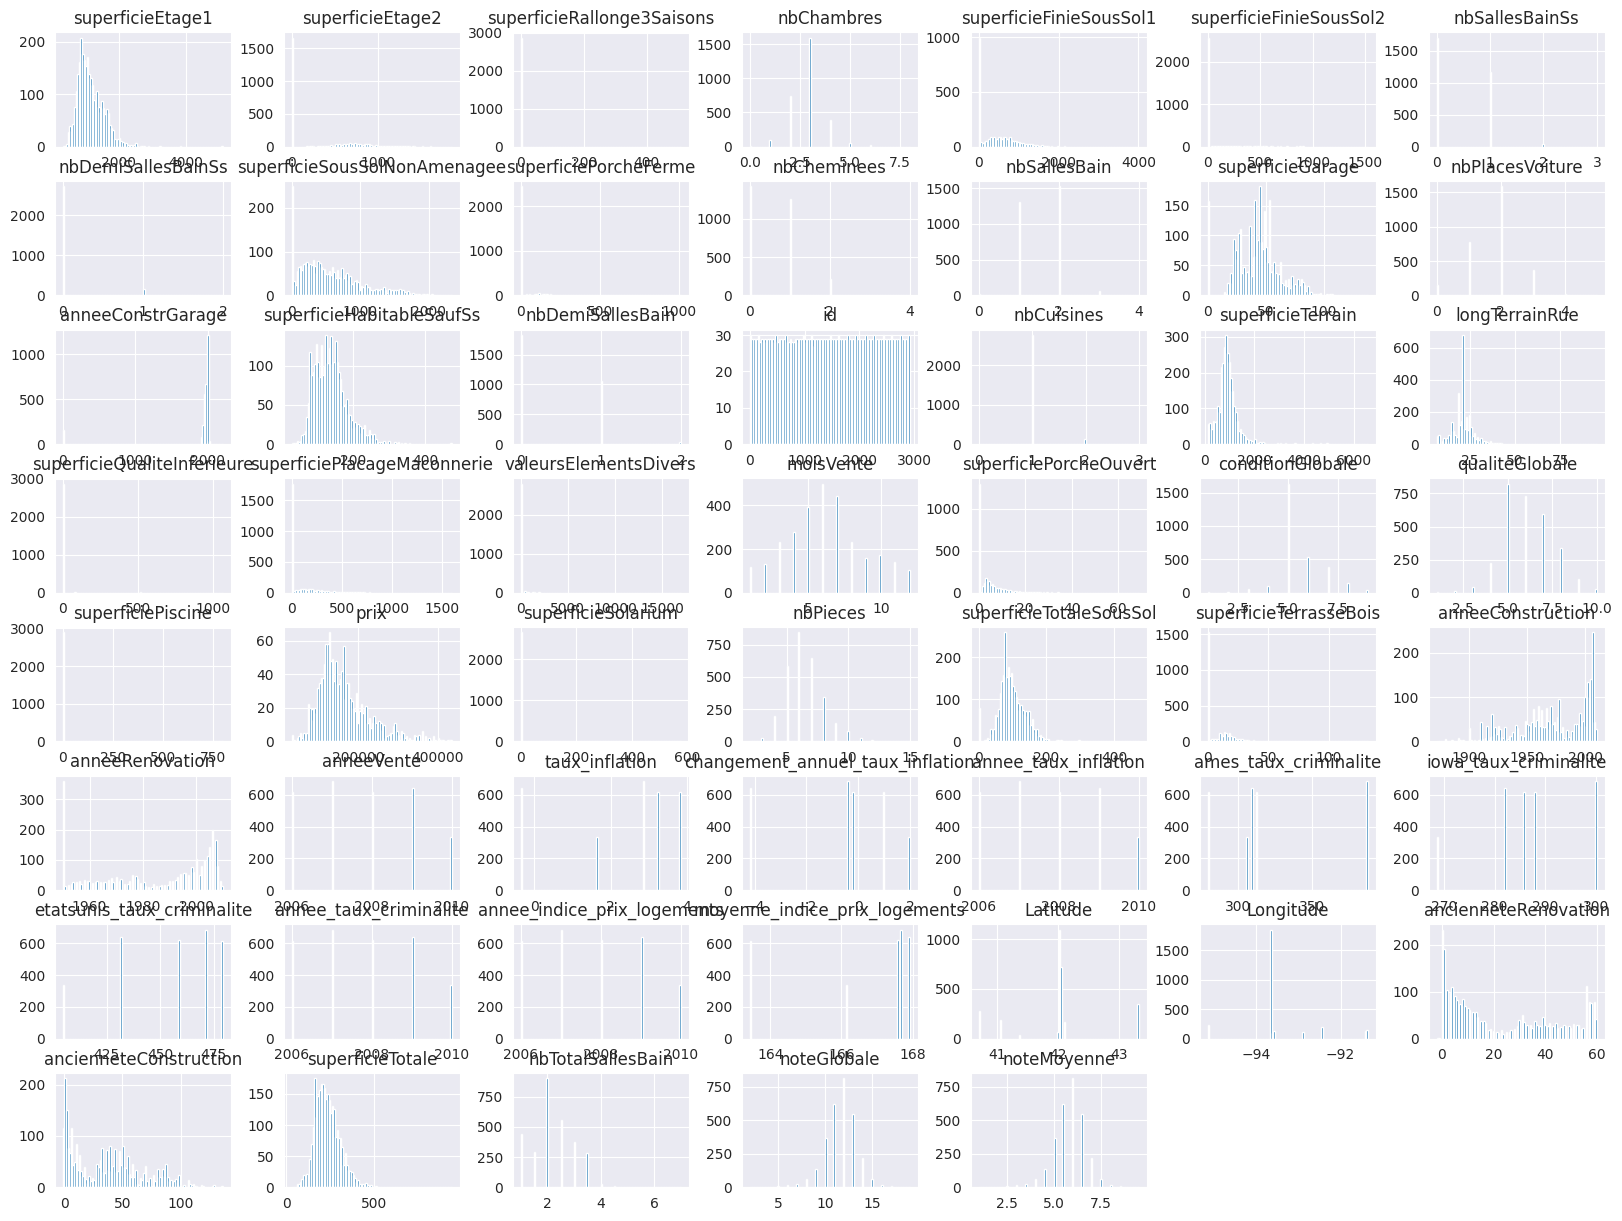

In [ ]:
# Répartition des variables numériques
df3.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
# Affichage des modalités de chaque variable numérique
for col in df3.columns:
    if df3[col].dtype not in ('object', 'category'):
        print(f'{col :-<25}, Min: {df3[col].min()}, Max: {df3[col].max()}')

superficieEtage1---------, Min: 334, Max: 5095
superficieEtage2---------, Min: 0, Max: 1862
superficieRallonge3Saisons, Min: 0, Max: 508
nbChambres---------------, Min: 0, Max: 8
superficieFinieSousSol1--, Min: 0.0, Max: 4010.0
superficieFinieSousSol2--, Min: 0.0, Max: 1526.0
nbSallesBainSs-----------, Min: 0.0, Max: 3.0
nbDemiSallesBainSs-------, Min: 0.0, Max: 2.0
superficieSousSolNonAmenagee, Min: 0.0, Max: 2336.0
superficiePorcheFerme----, Min: 0, Max: 1012
nbCheminees--------------, Min: 0, Max: 4
nbSallesBain-------------, Min: 0, Max: 4
superficieGarage---------, Min: 0.0, Max: 138.23972352
nbPlacesVoiture----------, Min: 0.0, Max: 5.0
anneeConstrGarage--------, Min: 0.0, Max: 2207.0
superficieHabitableSaufSs, Min: 31.02961536, Max: 473.3409888000001
nbDemiSallesBain---------, Min: 0, Max: 2
id-----------------------, Min: 1, Max: 2919
nbCuisines---------------, Min: 0, Max: 3
superficieTerrain--------, Min: 120.773952, Max: 6573.91201344
longTerrainRue-----------, Min: 6.4008, 

In [ ]:
# Affichage des modalités de chaque variable numérique afin de déterminer lesquelles seront renommées et/ou regroupées

for col in df3.select_dtypes(exclude=['object', 'category']):
    print(f'{col :-<30}, {df3[col].unique()}')

superficieEtage1--------------, [ 856 1262  920 ... 1778 1650 1960]
superficieEtage2--------------, [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  842 1286  864
  829 1092  709  844 1106  596  807  625  649  698  840  780  568  795
  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274 1347
 1332 1177 1080  695  915  576  605  862  495  403  838  517 1427  784
  711  468 1081  886  793  665  858  874  526  590  406 1157  299  936
  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600  678  834
  384  512  930  868  224 1103  560  811  878  5

In [ ]:
import seaborn as sns

# Affichage des informations pour chaque variable numérique
for col in df3.select_dtypes(include=np.number):
    # Afficher le nom de la variable et son intervalle
    print(f'{col :-<30}, Min: {df3[col].min()}, Max: {df3[col].max()}')

    # Afficher les valeurs uniques
    print(f'Valeurs uniques: {df3[col].unique()}')

    # Afficher la proportion de chaque valeur
    proportions = df3[col].value_counts(normalize=True)
    print("Proportion de chaque valeur :")
    print(proportions)

    # Afficher les statistiques descriptives
    print(df3[col].describe())

    # Tracer la distribution
    plt.figure(figsize=(9, 8))
    sns.distplot(df3[col], color='g', bins=100, hist_kws={'alpha': 0.4})
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.title(f'Distribution de {col}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Variable longTerrainRue

In [ ]:
df3['longTerrainRue'] = np.where(df3['longTerrainRue'] <= 10, 'Moins de 10 m',
                        np.where((df3['longTerrainRue'] > 10) & (df3['longTerrainRue'] <= 20), 'Entre 11 et 20 m',
                            np.where((df3['longTerrainRue'] > 20) & (df3['longTerrainRue'] <= 30), 'Entre 21 et 30 m',
                                'Plus de 31 m')))
unique_values_longTerrainRue = df3['longTerrainRue'].unique()
observations_count_longTerrainRue = df3['longTerrainRue'].value_counts()
print("Valeurs uniques pour 'longTerrainRue' :", unique_values_longTerrainRue)
print("\nNombre d'observations pour 'longTerrainRue' :", observations_count_longTerrainRue)

Valeurs uniques pour 'longTerrainRue' : ['Entre 11 et 20 m' 'Entre 21 et 30 m' 'Plus de 31 m' 'Moins de 10 m']

Nombre d'observations pour 'longTerrainRue' : Entre 21 et 30 m    1570
Entre 11 et 20 m    1013
Plus de 31 m         195
Moins de 10 m        125
Name: longTerrainRue, dtype: int64


#### Variable superficieTerrain

In [ ]:
df3['superficieTerrain'] = np.where(df3['superficieTerrain'] <= 100, 'Moins de 100 m2',
                                     np.where((df3['superficieTerrain'] > 100) & (df3['superficieTerrain'] <= 200), 'Entre 100 et 200 m2',
                                              np.where((df3['superficieTerrain'] > 200) & (df3['superficieTerrain'] <= 500), 'Entre 201 et 500 m2',
                                                       np.where((df3['superficieTerrain'] > 500) & (df3['superficieTerrain'] <= 1000), 'Entre 501 et 1000 m2',
                                                                np.where((df3['superficieTerrain'] > 1000) & (df3['superficieTerrain'] <= 2000), 'Entre 1001 et 2000 m2',
                                                                         'Plus de 2000 m2')))))

unique_values_superficieTerrain = df3['superficieTerrain'].unique()
observations_count_superficieTerrain = df3['superficieTerrain'].value_counts()

print("Valeurs uniques pour 'superficieTerrain' :", unique_values_superficieTerrain)
print("\nNombre d'observations pour 'superficieTerrain' :", observations_count_superficieTerrain)

Valeurs uniques pour 'superficieTerrain' : ['Entre 501 et 1000 m2' 'Entre 1001 et 2000 m2' 'Entre 201 et 500 m2'
 'Plus de 2000 m2' 'Entre 100 et 200 m2']

Nombre d'observations pour 'superficieTerrain' : Entre 501 et 1000 m2     1623
Entre 1001 et 2000 m2     880
Entre 201 et 500 m2       270
Plus de 2000 m2            65
Entre 100 et 200 m2        65
Name: superficieTerrain, dtype: int64


#### Variable qualiteGlobale

In [ ]:
# Conversion de 'qualiteGlobale'
df3['qualiteGlobale'] = df3['qualiteGlobale'].replace({1: 1, 2: 1,
                                                       3: 2, 4: 2,
                                                       5: 3, 6: 3,
                                                       7: 4, 8: 4,
                                                       9: 5, 10: 5})

# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_qualiteGlobale = df3['qualiteGlobale'].unique()
observations_count_qualiteGlobale = df3['qualiteGlobale'].value_counts()
print("\nValeurs uniques pour 'qualiteGlobale' :", unique_values_qualiteGlobale)
print("\nNombre d'observations pour 'qualiteGlobale' :", observations_count_qualiteGlobale)


Valeurs uniques pour 'qualiteGlobale' : [4 3 5 2 1]

Nombre d'observations pour 'qualiteGlobale' : 3    1554
4     939
2     266
5     127
1      17
Name: qualiteGlobale, dtype: int64


#### Variable conditionGlobale

In [ ]:
# Conversion de 'contitionGlobale'
df3['conditionGlobale'] = df3['conditionGlobale'].replace({1: 1, 2: 1,
                                                       3: 2, 4: 2,
                                                       5: 3, 6: 3,
                                                       7: 4, 8: 4,
                                                       9: 5})

# Affichage des valeurs uniques et de leur compte pour 'contitionGlobale'
unique_values_contitionGlobale = df3['conditionGlobale'].unique()
observations_count_contitionGlobale = df3['conditionGlobale'].value_counts()
print("\nValeurs uniques pour 'conditionGlobale' :", unique_values_contitionGlobale)
print("\nNombre d'observations pour 'conditionGlobale' :", observations_count_contitionGlobale)


Valeurs uniques pour 'conditionGlobale' : [3 4 2 1 5]

Nombre d'observations pour 'conditionGlobale' : 3    2161
4     533
2     151
5      41
1      17
Name: conditionGlobale, dtype: int64


### Variable anneeConstruction

In [ ]:
# Conversion de 'anneeConstruction'
df3['anneeConstruction'] = np.where(df3['anneeConstruction'] < 1900, 'Avant 1900',
                                     np.where((df3['anneeConstruction'] >= 1900) & (df3['anneeConstruction'] < 1925), '1900-1925',
                                              np.where((df3['anneeConstruction'] >= 1925) & (df3['anneeConstruction'] < 1950), '1925-1950',
                                                       np.where((df3['anneeConstruction'] >= 1950) & (df3['anneeConstruction'] < 1960), '1950-1960',
                                                                np.where((df3['anneeConstruction'] >= 1960) & (df3['anneeConstruction'] < 1970), '1960-1970',
                                                                         np.where((df3['anneeConstruction'] >= 1970) & (df3['anneeConstruction'] < 1980), '1970-1980',
                                                                                  np.where((df3['anneeConstruction'] >= 1985) & (df3['anneeConstruction'] < 1990), '1985-1990',
                                                                                           np.where((df3['anneeConstruction'] >= 1990) & (df3['anneeConstruction'] < 1995), '1990-1995',
                                                                                                    np.where((df3['anneeConstruction'] >= 1995) & (df3['anneeConstruction'] < 2000), '1995-2000',
                                                                                                             np.where((df3['anneeConstruction'] >= 2000) & (df3['anneeConstruction'] < 2005), '2000-2005',
                                                                                                                      '2005 et plus'))))))))))

# Affichage des valeurs uniques et de leur compte pour 'anneeConstruction'
unique_values_anneeConstruction = df3['anneeConstruction'].unique()
observations_count_anneeConstruction = df3['anneeConstruction'].value_counts()
print("\nValeurs uniques pour 'anneeConstruction' :", unique_values_anneeConstruction)
print("\nNombre d'observations pour 'anneeConstruction' :", observations_count_anneeConstruction)


Valeurs uniques pour 'anneeConstruction' : ['2000-2005' '1970-1980' '1900-1925' '1990-1995' '1925-1950' '1960-1970'
 '2005 et plus' '1950-1960' '1995-2000' '1985-1990' 'Avant 1900']

Nombre d'observations pour 'anneeConstruction' : 2005 et plus    524
1970-1980       360
1960-1970       355
1925-1950       339
1950-1960       339
2000-2005       316
1900-1925       267
1995-2000       196
1990-1995       133
1985-1990        48
Avant 1900       26
Name: anneeConstruction, dtype: int64


### Variable anneeRenovation

In [ ]:
# Conversion de 'anneeRenovation'
df3['anneeRenovation'] = np.where((df3['anneeRenovation'] >= 1950) & (df3['anneeRenovation'] < 1960), '1950-1960',
                                  np.where((df3['anneeRenovation'] >= 1960) & (df3['anneeRenovation'] < 1970), '1960-1970',
                                           np.where((df3['anneeRenovation'] >= 1970) & (df3['anneeRenovation'] < 1980), '1970-1980',
                                                    np.where((df3['anneeRenovation'] >= 1985) & (df3['anneeRenovation'] < 1990), '1985-1990',
                                                             np.where((df3['anneeRenovation'] >= 1990) & (df3['anneeRenovation'] < 1995), '1990-1995',
                                                                      np.where((df3['anneeRenovation'] >= 1995) & (df3['anneeRenovation'] < 2000), '1995-2000',
                                                                               np.where((df3['anneeRenovation'] >= 2000) & (df3['anneeRenovation'] < 2005), '2000-2005',
                                                                                        np.where((df3['anneeRenovation'] >= 2005) & (df3['anneeRenovation'] < 2010), '2005-2010',
                                                                                                 '2010 et plus'))))))))

# Affichage des valeurs uniques et de leur compte pour 'anneeRenovation'
unique_values_anneeRenovation = df3['anneeRenovation'].unique()
observations_count_anneeRenovation = df3['anneeRenovation'].value_counts()
print("\nValeurs uniques pour 'anneeRenovation' :", unique_values_anneeRenovation)
print("\nNombre d'observations pour 'anneeRenovation' :", observations_count_anneeRenovation)


Valeurs uniques pour 'anneeRenovation' : ['2000-2005' '1970-1980' '1995-2000' '2005-2010' '1950-1960' '1960-1970'
 '1990-1995' '2010 et plus' '1985-1990']

Nombre d'observations pour 'anneeRenovation' : 2005-2010       614
1950-1960       577
2000-2005       443
1970-1980       334
1995-2000       298
1960-1970       287
1990-1995       186
2010 et plus     89
1985-1990        75
Name: anneeRenovation, dtype: int64


### Variable superficiePlacageMaconnerie

In [ ]:
import numpy as np

df3['superficiePlacageMaconnerie'] = np.where(df3['superficiePlacageMaconnerie'] == 0, '0',
                                           np.where(df3['superficiePlacageMaconnerie'] < 200, '< 200 m2',
                                                    np.where((df3['superficiePlacageMaconnerie'] >= 200) & (df3['superficiePlacageMaconnerie'] < 400), '200-400 m2',
                                                             np.where((df3['superficiePlacageMaconnerie'] >= 400) & (df3['superficiePlacageMaconnerie'] < 600), '400-600 m2',
                                                                      np.where((df3['superficiePlacageMaconnerie'] >= 600) & (df3['superficiePlacageMaconnerie'] < 800), '600-800 m2',
                                                                               np.where((df3['superficiePlacageMaconnerie'] >= 800) & (df3['superficiePlacageMaconnerie'] < 1000), '800-1000 m2',
                                                                                        '> 1000 m2'))))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficiePlacageMaconnerie'
unique_values_superficiePlacageMaconnerie = df3['superficiePlacageMaconnerie'].unique()
observations_count_superficiePlacageMaconnerie = df3['superficiePlacageMaconnerie'].value_counts()

print("Valeurs uniques pour 'superficiePlacageMaconnerie' :", unique_values_superficiePlacageMaconnerie)
print("\nNombre d'observations pour 'superficiePlacageMaconnerie' :", observations_count_superficiePlacageMaconnerie)


Valeurs uniques pour 'superficiePlacageMaconnerie' : ['< 200 m2' '0' '200-400 m2' '600-800 m2' '400-600 m2' '> 1000 m2'
 '800-1000 m2']

Nombre d'observations pour 'superficiePlacageMaconnerie' : 0              1758
< 200 m2        564
200-400 m2      383
400-600 m2      130
600-800 m2       45
> 1000 m2        12
800-1000 m2      11
Name: superficiePlacageMaconnerie, dtype: int64


#### Variable superficieFinieSousSol1

In [ ]:
import numpy as np

df3['superficieFinieSousSol1'] = np.where(df3['superficieFinieSousSol1'] == 0, '0',
                                           np.where(df3['superficieFinieSousSol1'] < 500, '< 500 m2',
                                                    np.where((df3['superficieFinieSousSol1'] >= 500) & (df3['superficieFinieSousSol1'] < 1000), '500-1000 m2',
                                                             np.where((df3['superficieFinieSousSol1'] >= 1000) & (df3['superficieFinieSousSol1'] < 1500), '1000-1500 m2',
                                                                      np.where((df3['superficieFinieSousSol1'] >= 1500) & (df3['superficieFinieSousSol1'] <= 1904), '1500-1904 m2',
                                                                               '> 1904 m2')))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieFinieSousSol1'
unique_values_superficieFinieSousSol1 = df3['superficieFinieSousSol1'].unique()
observations_count_superficieFinieSousSol1 = df3['superficieFinieSousSol1'].value_counts()

print("Valeurs uniques pour 'superficieFinieSousSol1' :", unique_values_superficieFinieSousSol1)
print("\nNombre d'observations pour 'superficieFinieSousSol1' :", observations_count_superficieFinieSousSol1)

Valeurs uniques pour 'superficieFinieSousSol1' : ['500-1000 m2' '< 500 m2' '1000-1500 m2' '0' '1500-1904 m2' '> 1904 m2']

Nombre d'observations pour 'superficieFinieSousSol1' : 0               927
500-1000 m2     854
< 500 m2        782
1000-1500 m2    291
1500-1904 m2     41
> 1904 m2         8
Name: superficieFinieSousSol1, dtype: int64


#### Variable superficieFinieSousSol2

In [ ]:
import numpy as np

df3['superficieFinieSousSol2'] = np.where(df3['superficieFinieSousSol2'] == 0, '0',
                                           np.where(df3['superficieFinieSousSol2'] < 500, '< 500 m2',
                                                    np.where((df3['superficieFinieSousSol2'] >= 500) & (df3['superficieFinieSousSol2'] < 1000), '500-1000 m2',
                                                             np.where((df3['superficieFinieSousSol2'] >= 1000) & (df3['superficieFinieSousSol2'] < 1500), '1000-1500 m2',
                                                                      np.where((df3['superficieFinieSousSol2'] >= 1500) & (df3['superficieFinieSousSol2'] <= 1474), '1500-1474 m2',
                                                                               '> 1474 m2')))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieFinieSousSol2'
unique_values_superficieFinieSousSol2 = df3['superficieFinieSousSol2'].unique()
observations_count_superficieFinieSousSol2 = df3['superficieFinieSousSol2'].value_counts()

print("Valeurs uniques pour 'superficieFinieSousSol2' :", unique_values_superficieFinieSousSol2)
print("\nNombre d'observations pour 'superficieFinieSousSol2' :", observations_count_superficieFinieSousSol2)

Valeurs uniques pour 'superficieFinieSousSol2' : ['0' '< 500 m2' '500-1000 m2' '1000-1500 m2' '> 1474 m2']

Nombre d'observations pour 'superficieFinieSousSol2' : 0               2558
< 500 m2         235
500-1000 m2       92
1000-1500 m2      17
> 1474 m2          1
Name: superficieFinieSousSol2, dtype: int64


#### Variable superficieSousSolNonAmenagee

In [ ]:
import numpy as np

df3['superficieSousSolNonAmenagee'] = np.where(df3['superficieSousSolNonAmenagee'] == 0, '0',
                                           np.where(df3['superficieSousSolNonAmenagee'] < 500, '< 500 m2',
                                                    np.where((df3['superficieSousSolNonAmenagee'] >= 500) & (df3['superficieSousSolNonAmenagee'] < 1000), '500-1000 m2',
                                                             np.where((df3['superficieSousSolNonAmenagee'] >= 1000) & (df3['superficieSousSolNonAmenagee'] < 1500), '1000-1500 m2',
                                                                      np.where((df3['superficieSousSolNonAmenagee'] >= 1500) & (df3['superficieSousSolNonAmenagee'] <= 2336), '1500-2336 m2',
                                                                               '> 2336 m2')))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieSousSolNonAmenagee'
unique_values_superficieSousSolNonAmenagee = df3['superficieSousSolNonAmenagee'].unique()
observations_count_superficieSousSolNonAmenagee = df3['superficieSousSolNonAmenagee'].value_counts()

print("Valeurs uniques pour 'superficieSousSolNonAmenagee' :", unique_values_superficieSousSolNonAmenagee)
print("\nNombre d'observations pour 'superficieSousSolNonAmenagee' :", observations_count_superficieSousSolNonAmenagee)

Valeurs uniques pour 'superficieSousSolNonAmenagee' : ['< 500 m2' '500-1000 m2' '1000-1500 m2' '0' '1500-2336 m2']

Nombre d'observations pour 'superficieSousSolNonAmenagee' : < 500 m2        1290
500-1000 m2      923
1000-1500 m2     321
0                242
1500-2336 m2     127
Name: superficieSousSolNonAmenagee, dtype: int64


### Variable superficieTotaleSousSol

In [ ]:
# Application des tranches à la variable superficieTotaleSousSol
df3['superficieTotaleSousSol'] = np.where(df3['superficieTotaleSousSol'] == 0, '0',
                                           np.where(df3['superficieTotaleSousSol'] < 25, '< 25 m2',
                                                    np.where((df3['superficieTotaleSousSol'] >= 25) & (df3['superficieTotaleSousSol'] < 50), '25-50 m2',
                                                             np.where((df3['superficieTotaleSousSol'] >= 50) & (df3['superficieTotaleSousSol'] < 75), '50-75 m2',
                                                                      np.where((df3['superficieTotaleSousSol'] >= 75) & (df3['superficieTotaleSousSol'] < 100), '75-100 m2',
                                                                               np.where((df3['superficieTotaleSousSol'] >= 100) & (df3['superficieTotaleSousSol'] <= 150), '100-150 m2',
                                                                                        '> 150 m2'))))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieTotaleSousSol'
unique_values_superficieSousSol = df3['superficieTotaleSousSol'].unique()
observations_count_superficieSousSol = df3['superficieTotaleSousSol'].value_counts()

print("Valeurs uniques pour 'superficieTotaleSousSol' :", unique_values_superficieSousSol)
print("\nNombre d'observations pour 'superficieTotaleSousSol' :", observations_count_superficieSousSol)

Valeurs uniques pour 'superficieTotaleSousSol' : ['75-100 m2' '100-150 m2' '50-75 m2' '> 150 m2' '0' '25-50 m2' '< 25 m2']

Nombre d'observations pour 'superficieTotaleSousSol' : 75-100 m2     939
100-150 m2    910
50-75 m2      573
> 150 m2      274
25-50 m2      115
0              79
< 25 m2        13
Name: superficieTotaleSousSol, dtype: int64


#### Variable superficieEtage1

In [ ]:
import numpy as np

df3['superficieEtage1'] = np.where(df3['superficieEtage1'] < 500, '< 500 m2',
                                    np.where((df3['superficieEtage1'] >= 500) & (df3['superficieEtage1'] < 1000), '500-1000 m2',
                                             np.where((df3['superficieEtage1'] >= 1000) & (df3['superficieEtage1'] < 1500), '1000-1500 m2',
                                                      np.where((df3['superficieEtage1'] >= 1500) & (df3['superficieEtage1'] < 2000), '1500-2000 m2',
                                                               '> 2000 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieEtage1'
unique_values_superficieEtage1 = df3['superficieEtage1'].unique()
observations_count_superficieEtage1 = df3['superficieEtage1'].value_counts()

print("Valeurs uniques pour 'superficieEtage1' :", unique_values_superficieEtage1)
print("\nNombre d'observations pour 'superficieEtage1' :", observations_count_superficieEtage1)

Valeurs uniques pour 'superficieEtage1' : ['500-1000 m2' '1000-1500 m2' '1500-2000 m2' '> 2000 m2' '< 500 m2']

Nombre d'observations pour 'superficieEtage1' : 1000-1500 m2    1190
500-1000 m2     1151
1500-2000 m2     461
> 2000 m2         75
< 500 m2          26
Name: superficieEtage1, dtype: int64


#### Variable superficieEtage2

In [ ]:
import numpy as np

df3['superficieEtage2'] = np.where(df3['superficieEtage2'] == 0, '0 m2',
                                    np.where((df3['superficieEtage2'] > 0) & (df3['superficieEtage2'] <= 500), '1-500 m2',
                                             np.where((df3['superficieEtage2'] > 500) & (df3['superficieEtage2'] <= 1000), '501-1000 m2',
                                                      np.where((df3['superficieEtage2'] > 1000) & (df3['superficieEtage2'] <= 1500), '1001-1500 m2',
                                                               '> 1500 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieEtage2'
unique_values_superficieEtage2 = df3['superficieEtage2'].unique()
observations_count_superficieEtage2 = df3['superficieEtage2'].value_counts()

print("Valeurs uniques pour 'superficieEtage2' :", unique_values_superficieEtage2)
print("\nNombre d'observations pour 'superficieEtage2' :", observations_count_superficieEtage2)

Valeurs uniques pour 'superficieEtage2' : ['501-1000 m2' '0 m2' '1001-1500 m2' '> 1500 m2' '1-500 m2']

Nombre d'observations pour 'superficieEtage2' : 0 m2            1663
501-1000 m2      871
1001-1500 m2     208
1-500 m2         145
> 1500 m2         16
Name: superficieEtage2, dtype: int64


#### Variable superficieQualiteInferieure

In [ ]:
import numpy as np

df3['superficieQualiteInferieure'] = np.where(df3['superficieQualiteInferieure'] == 0, '0 m2',
                                    np.where((df3['superficieQualiteInferieure'] > 0) & (df3['superficieQualiteInferieure'] <= 100), '1-100 m2',
                                             np.where((df3['superficieQualiteInferieure'] > 100) & (df3['superficieQualiteInferieure'] <= 200), '101-200 m2',
                                                      np.where((df3['superficieQualiteInferieure'] > 200) & (df3['superficieQualiteInferieure'] <= 300), '201-300 m2',
                                                               np.where((df3['superficieQualiteInferieure'] > 300) & (df3['superficieQualiteInferieure'] <= 400), '301-400 m2',
                                                                        np.where((df3['superficieQualiteInferieure'] > 400) & (df3['superficieQualiteInferieure'] <= 500), '401-500 m2',
                                                                                 '> 500 m2'))))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieQualiteInferieure'
unique_values_superficieQualiteInferieure = df3['superficieQualiteInferieure'].unique()
observations_count_superficieQualiteInferieure = df3['superficieQualiteInferieure'].value_counts()

print("Valeurs uniques pour 'superficieQualiteInferieure' :", unique_values_superficieQualiteInferieure)
print("\nNombre d'observations pour 'superficieQualiteInferieure' :", observations_count_superficieQualiteInferieure)

Valeurs uniques pour 'superficieQualiteInferieure' : ['0 m2' '301-400 m2' '> 500 m2' '201-300 m2' '101-200 m2' '401-500 m2'
 '1-100 m2']

Nombre d'observations pour 'superficieQualiteInferieure' : 0 m2          2863
301-400 m2       9
> 500 m2         8
401-500 m2       7
101-200 m2       6
201-300 m2       5
1-100 m2         5
Name: superficieQualiteInferieure, dtype: int64


### Variable superficieHabitableSaufSs

In [ ]:
# Application des tranches à la variable superficieHabitableSaufSs
df3['superficieHabitableSaufSs'] = np.where(df3['superficieHabitableSaufSs'] < 50, '< 50 m2',
                                           np.where((df3['superficieHabitableSaufSs'] >= 50) & (df3['superficieHabitableSaufSs'] < 75), '50-75 m2',
                                                    np.where((df3['superficieHabitableSaufSs'] >= 75) & (df3['superficieHabitableSaufSs'] < 100), '75-100 m2',
                                                             np.where((df3['superficieHabitableSaufSs'] >= 100) & (df3['superficieHabitableSaufSs'] < 150), '100-150 m2',
                                                                      np.where((df3['superficieHabitableSaufSs'] >= 150) & (df3['superficieHabitableSaufSs'] < 200), '150-200 m2',
                                                                               np.where((df3['superficieHabitableSaufSs'] >= 200) & (df3['superficieHabitableSaufSs'] < 250), '200-250 m2',
                                                                                        '> 250 m2'))))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieHabitableSaufSs'
unique_values_superficieHabitableSaufSs = df3['superficieHabitableSaufSs'].unique()
observations_count_superficieHabitableSaufSs = df3['superficieHabitableSaufSs'].value_counts()

print("Valeurs uniques pour 'superficieHabitableSaufSs' :", unique_values_superficieHabitableSaufSs)
print("\nNombre d'observations pour 'superficieHabitableSaufSs' :", observations_count_superficieHabitableSaufSs)

Valeurs uniques pour 'superficieHabitableSaufSs' : ['150-200 m2' '100-150 m2' '200-250 m2' '75-100 m2' '< 50 m2' '> 250 m2'
 '50-75 m2']

Nombre d'observations pour 'superficieHabitableSaufSs' : 100-150 m2    1264
150-200 m2     748
75-100 m2      526
200-250 m2     223
50-75 m2        77
> 250 m2        58
< 50 m2          7
Name: superficieHabitableSaufSs, dtype: int64


### Variable nbSallesBainSs

In [ ]:
# Conversion de 'qualiteGlobale'
df3['nbSallesBainSs'] = df3['nbSallesBainSs'].replace({0: 0, 1: 1,
                                                 2: 2, 3: 3})

# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_nbSallesBainSs = df3['nbSallesBainSs'].unique()
observations_count_nbSallesBainSs = df3['nbSallesBainSs'].value_counts()
print("\nValeurs uniques pour 'nbSallesBainSs' :", unique_values_nbSallesBainSs)
print("\nNombre d'observations pour 'nbSallesBainSs' :", observations_count_nbSallesBainSs)


Valeurs uniques pour 'nbSallesBainSs' : [1.         0.         2.         3.         0.42743881]

Nombre d'observations pour 'nbSallesBainSs' : 0.000000    1700
1.000000    1164
2.000000      35
3.000000       2
0.427439       2
Name: nbSallesBainSs, dtype: int64


### Variable nbDemiSallesBainSs

In [ ]:
# Conversion de 'qualiteGlobale'
df3['nbDemiSallesBainSs'] = df3['nbDemiSallesBainSs'].replace({0: 0, 1: 1, 2: 2})

# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_nbDemiSallesBainSs = df3['nbDemiSallesBainSs'].unique()
observations_count_nbDemiSallesBainSs = df3['nbDemiSallesBainSs'].value_counts()
print("\nValeurs uniques pour 'nbDemiSallesBainSs' :", unique_values_nbDemiSallesBainSs)
print("\nNombre d'observations pour 'nbDemiSallesBainSs' :", observations_count_nbDemiSallesBainSs)


Valeurs uniques pour 'nbDemiSallesBainSs' : [0.         1.         2.         0.06101344]

Nombre d'observations pour 'nbDemiSallesBainSs' : 0.000000    2728
1.000000     169
2.000000       4
0.061013       2
Name: nbDemiSallesBainSs, dtype: int64


### Variable nbSalleBain

In [ ]:
# Conversion de 'qualiteGlobale'
df3['nbSallesBain'] = df3['nbSallesBain'].replace({1: 1, 2: 1,
                                                 3: 2, 4: 2,
                                                 5: 3, 6: 3,
                                                 7: 4, 8: 4,
                                                 9: 5, 10: 5})

# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_nbSalleBain = df3['nbSallesBain'].unique()
observations_count_nbSalleBain = df3['nbSallesBain'].value_counts()
print("\nValeurs uniques pour 'nbSallesBain' :", unique_values_nbSalleBain)
print("\nNombre d'observations pour 'nbSallesBain' :", observations_count_nbSalleBain)


Valeurs uniques pour 'nbSallesBain' : [1 2 0]

Nombre d'observations pour 'nbSallesBain' : 1    2831
2      60
0      12
Name: nbSallesBain, dtype: int64


####Variable nbDemiSallesBain

In [ ]:
# Conversion de 'qualiteGlobale'
df3['nbDemiSallesBain'] = df3['nbDemiSallesBain'].replace({0: 0, 1: 1, 2: 2})


# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_nbDemiSallesBain = df3['nbDemiSallesBain'].unique()
observations_count_nbDemiSallesBain = df3['nbDemiSallesBain'].value_counts()
print("\nValeurs uniques pour 'nbDemiSallesBain' :", unique_values_nbDemiSallesBain)
print("\nNombre d'observations pour 'nbDemiSallesBain' :", observations_count_nbDemiSallesBain)


Valeurs uniques pour 'nbDemiSallesBain' : [1 0 2]

Nombre d'observations pour 'nbDemiSallesBain' : 0    1828
1    1050
2      25
Name: nbDemiSallesBain, dtype: int64


### Variable nbChambres

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'qualiteGlobale'
unique_values_nbChambres = df3['nbChambres'].unique()
observations_count_nbChambres = df3['nbChambres'].value_counts()
print("\nValeurs uniques pour 'nbChambres' :", unique_values_nbChambres)
print("\nNombre d'observations pour 'nbChambres' :", observations_count_nbChambres)


Valeurs uniques pour 'nbChambres' : [3 4 1 2 0 5 6 8]

Nombre d'observations pour 'nbChambres' : 3    1592
2     739
4     392
1     102
5      48
6      21
0       8
8       1
Name: nbChambres, dtype: int64


### Variable nbCuisines

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_nbCuisines = df3['nbCuisines'].unique()
observations_count_nbCuisines = df3['nbCuisines'].value_counts()
print("\nValeurs uniques pour 'nbCuisines' :", unique_values_nbCuisines)
print("\nNombre d'observations pour 'nbCuisines' :", observations_count_nbCuisines)


Valeurs uniques pour 'nbCuisines' : [1 2 3 0]

Nombre d'observations pour 'nbCuisines' : 1    2769
2     129
0       3
3       2
Name: nbCuisines, dtype: int64


### Variable nbPieces

In [ ]:
# Remplacer les valeurs de nbPieces supérieures à 10 par 10
df3['nbPieces'] = df3['nbPieces'].apply(lambda x: 10 if x > 10 else x)

# Affichage des valeurs uniques et de leur compte pour 'nbPieces'
unique_values_nbPieces = df3['nbPieces'].unique()
observations_count_nbPieces = df3['nbPieces'].value_counts()
print("\nValeurs uniques pour 'nbPieces' :", unique_values_nbPieces)
print("\nNombre d'observations pour 'nbPieces' :", observations_count_nbPieces)


Valeurs uniques pour 'nbPieces' : [ 8  6  7  9  5 10  4  3  2]

Nombre d'observations pour 'nbPieces' : 6     844
7     647
5     582
8     346
4     196
9     142
10    120
3      25
2       1
Name: nbPieces, dtype: int64


### Variable nbCheminees

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_nbCheminees = df3['nbCheminees'].unique()
observations_count_nbCheminees = df3['nbCheminees'].value_counts()
print("\nValeurs uniques pour 'nbCheminees' :", unique_values_nbCheminees)
print("\nNombre d'observations pour 'nbCheminees' :", observations_count_nbCheminees)


Valeurs uniques pour 'nbCheminees' : [0 1 2 3 4]

Nombre d'observations pour 'nbCheminees' : 0    1420
1    1262
2     210
3      10
4       1
Name: nbCheminees, dtype: int64


#### Variable anneeConstrGarage

In [ ]:
# Conversion de 'anneeConstrGarage'
df3['anneeConstrGarage'] = np.where(df3['anneeConstrGarage'] == 0, 'Pas de garage',
                                     np.where((df3['anneeConstrGarage'] >= 1900) & (df3['anneeConstrGarage'] < 1950), 'Avant 1950',
                                              np.where((df3['anneeConstrGarage'] >= 1950) & (df3['anneeConstrGarage'] < 1960), '1950-1959',
                                                       np.where((df3['anneeConstrGarage'] >= 1960) & (df3['anneeConstrGarage'] < 1970), '1960-1969',
                                                                np.where((df3['anneeConstrGarage'] >= 1970) & (df3['anneeConstrGarage'] < 1980), '1970-1979',
                                                                         np.where((df3['anneeConstrGarage'] >= 1980) & (df3['anneeConstrGarage'] < 1990), '1980-1989',
                                                                                  np.where((df3['anneeConstrGarage'] >= 1990) & (df3['anneeConstrGarage'] < 2000), '1990-1999',
                                                                                           np.where((df3['anneeConstrGarage'] >= 2000) & (df3['anneeConstrGarage'] < 2010), '2000-2009',
                                                                                                    '2010 et après'))))))))

# Affichage des valeurs uniques et de leur compte pour 'anneeConstrGarage'
unique_values_anneeConstrGarage = df3['anneeConstrGarage'].unique()
observations_count_anneeConstrGarage = df3['anneeConstrGarage'].value_counts()
print("\nValeurs uniques pour 'anneeConstrGarage' :", unique_values_anneeConstrGarage)
print("\nNombre d'observations pour 'anneeConstrGarage' :", observations_count_anneeConstrGarage)



Valeurs uniques pour 'anneeConstrGarage' : ['2000-2009' '1970-1979' '1990-1999' 'Avant 1950' '1960-1969' '1950-1959'
 'Pas de garage' '1980-1989' '2010 et après']

Nombre d'observations pour 'anneeConstrGarage' : 2000-2009        793
1990-1999        386
1970-1979        366
1960-1969        359
Avant 1950       339
1950-1959        320
1980-1989        173
Pas de garage    159
2010 et après      8
Name: anneeConstrGarage, dtype: int64


####Variable nbPlacesVoiture

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_nbPlacesVoiture = df3['nbPlacesVoiture'].unique()
observations_count_nbPlacesVoiture = df3['nbPlacesVoiture'].value_counts()
print("\nValeurs uniques pour 'nbPlacesVoiture' :", unique_values_nbPlacesVoiture)
print("\nNombre d'observations pour 'nbPlacesVoiture' :", observations_count_nbPlacesVoiture)


Valeurs uniques pour 'nbPlacesVoiture' : [2.         3.         1.         0.         4.         5.
 1.76154376]

Nombre d'observations pour 'nbPlacesVoiture' : 2.000000    1589
1.000000     776
3.000000     363
0.000000     157
4.000000      16
5.000000       1
1.761544       1
Name: nbPlacesVoiture, dtype: int64


### Variable superficieGarage

In [ ]:
# Application des tranches à la variable superficieGarage
df3['superficieGarage'] = np.where(df3['superficieGarage'] == 0, '0',
                                    np.where(df3['superficieGarage'] < 20, '< 20 m2',
                                             np.where((df3['superficieGarage'] >= 20) & (df3['superficieGarage'] < 30), '20-30 m2',
                                                      np.where((df3['superficieGarage'] >= 30) & (df3['superficieGarage'] < 40), '30-40 m2',
                                                               np.where((df3['superficieGarage'] >= 40) & (df3['superficieGarage'] < 60), '40-60 m2',
                                                                        np.where((df3['superficieGarage'] >= 60) & (df3['superficieGarage'] < 80), '60-80 m2',
                                                                                 '> 80 m2'))))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieGarage'
unique_values_superficieGarage = df3['superficieGarage'].unique()
observations_count_superficieGarage = df3['superficieGarage'].value_counts()

print("Valeurs uniques pour 'superficieGarage' :", unique_values_superficieGarage)
print("\nNombre d'observations pour 'superficieGarage' :", observations_count_superficieGarage)

Valeurs uniques pour 'superficieGarage' : ['40-60 m2' '60-80 m2' '< 20 m2' '30-40 m2' '20-30 m2' '> 80 m2' '0']

Nombre d'observations pour 'superficieGarage' : 40-60 m2    1297
20-30 m2     519
30-40 m2     377
60-80 m2     356
0            157
> 80 m2      138
< 20 m2       59
Name: superficieGarage, dtype: int64


### Variable superficieTerrasseBois

In [ ]:
# Application des tranches à la variable superficieTerrasseBois
df3['superficieTerrasseBois'] = np.where(df3['superficieTerrasseBois'] == 0, '0',
                                          np.where(df3['superficieTerrasseBois'] < 10, '< 10 m2',
                                                   np.where((df3['superficieTerrasseBois'] >= 10) & (df3['superficieTerrasseBois'] <= 20), '10-20 m2',
                                                            '> 20 m2')))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieTerrasseBois'
unique_values_superficieTerrasseBois = df3['superficieTerrasseBois'].unique()
observations_count_superficieTerrasseBois = df3['superficieTerrasseBois'].value_counts()

print("Valeurs uniques pour 'superficieTerrasseBois' :", unique_values_superficieTerrasseBois)
print("\nNombre d'observations pour 'superficieTerrasseBois' :", observations_count_superficieTerrasseBois)

Valeurs uniques pour 'superficieTerrasseBois' : ['0' '> 20 m2' '10-20 m2' '< 10 m2']

Nombre d'observations pour 'superficieTerrasseBois' : 0           1518
10-20 m2     700
> 20 m2      430
< 10 m2      255
Name: superficieTerrasseBois, dtype: int64


### Variable superficiePorcheOuvert

In [ ]:
# Application des tranches à la variable superficiePorcheOuvert
df3['superficiePorcheOuvert'] = np.where(df3['superficiePorcheOuvert'] == 0, '0',
                                          np.where(df3['superficiePorcheOuvert'] < 5, '< 5 m2',
                                                   '> 5 m2'))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficiePorcheOuvert'
unique_values_superficiePorcheOuvert = df3['superficiePorcheOuvert'].unique()
observations_count_superficiePorcheOuvert = df3['superficiePorcheOuvert'].value_counts()

print("Valeurs uniques pour 'superficiePorcheOuvert' :", unique_values_superficiePorcheOuvert)
print("\nNombre d'observations pour 'superficiePorcheOuvert' :", observations_count_superficiePorcheOuvert)

Valeurs uniques pour 'superficiePorcheOuvert' : ['> 5 m2' '0' '< 5 m2']

Nombre d'observations pour 'superficiePorcheOuvert' : 0         1296
> 5 m2     924
< 5 m2     683
Name: superficiePorcheOuvert, dtype: int64


#### Variable superficiePorcheFerme

In [ ]:
# Application des tranches à la variable superficiePorcheFerme
df3['superficiePorcheFerme'] = np.where(df3['superficiePorcheFerme'] == 0, 'Pas de porche fermé',
                                         np.where((df3['superficiePorcheFerme'] > 0) & (df3['superficiePorcheFerme'] <= 100), '1-100 m2',
                                                  np.where((df3['superficiePorcheFerme'] > 100) & (df3['superficiePorcheFerme'] <= 200), '101-200 m2',
                                                           np.where((df3['superficiePorcheFerme'] > 200) & (df3['superficiePorcheFerme'] <= 300), '201-300 m2',
                                                                    '> 300 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficiePorcheFerme'
unique_values_superficiePorcheFerme = df3['superficiePorcheFerme'].unique()
observations_count_superficiePorcheFerme = df3['superficiePorcheFerme'].value_counts()

print("Valeurs uniques pour 'superficiePorcheFerme' :", unique_values_superficiePorcheFerme)
print("\nNombre d'observations pour 'superficiePorcheFerme' :", observations_count_superficiePorcheFerme)

Valeurs uniques pour 'superficiePorcheFerme' : ['Pas de porche fermé' '201-300 m2' '101-200 m2' '1-100 m2' '> 300 m2']

Nombre d'observations pour 'superficiePorcheFerme' : Pas de porche fermé    2444
101-200 m2              206
1-100 m2                145
201-300 m2               95
> 300 m2                 13
Name: superficiePorcheFerme, dtype: int64


#### Variable superficieRallonge3Saisons

In [ ]:
# Application des tranches à la variable superficieRallonge3Saisons
df3['superficieRallonge3Saisons'] = np.where(df3['superficieRallonge3Saisons'] == 0, 'Pas de rallonge 3 saisons',
                                              np.where((df3['superficieRallonge3Saisons'] > 0) & (df3['superficieRallonge3Saisons'] <= 100), '1-100 m2',
                                                       np.where((df3['superficieRallonge3Saisons'] > 100) & (df3['superficieRallonge3Saisons'] <= 200), '101-200 m2',
                                                                np.where((df3['superficieRallonge3Saisons'] > 200) & (df3['superficieRallonge3Saisons'] <= 300), '> 201 m2',
                                                                         '> 201 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieRallonge3Saisons'
unique_values_superficieRallonge3Saisons = df3['superficieRallonge3Saisons'].unique()
observations_count_superficieRallonge3Saisons = df3['superficieRallonge3Saisons'].value_counts()

print("Valeurs uniques pour 'superficieRallonge3Saisons' :", unique_values_superficieRallonge3Saisons)
print("\nNombre d'observations pour 'superficieRallonge3Saisons' :", observations_count_superficieRallonge3Saisons)


Valeurs uniques pour 'superficieRallonge3Saisons' : ['Pas de rallonge 3 saisons' '> 201 m2' '101-200 m2' '1-100 m2']

Nombre d'observations pour 'superficieRallonge3Saisons' : Pas de rallonge 3 saisons    2866
101-200 m2                     19
> 201 m2                       15
1-100 m2                        3
Name: superficieRallonge3Saisons, dtype: int64


#### Variable superficieSolarium

In [ ]:
# Application des tranches à la variable superficieSolarium
df3['superficieSolarium'] = np.where(df3['superficieSolarium'] == 0, 'Pas de solarium',
                                      np.where((df3['superficieSolarium'] > 0) & (df3['superficieSolarium'] <= 100), '1-100 m2',
                                               np.where((df3['superficieSolarium'] > 100) & (df3['superficieSolarium'] <= 200), '101-200 m2',
                                                        np.where((df3['superficieSolarium'] > 200) & (df3['superficieSolarium'] <= 300), '201-300 m2',
                                                                 '> 300 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieSolarium'
unique_values_superficieSolarium = df3['superficieSolarium'].unique()
observations_count_superficieSolarium = df3['superficieSolarium'].value_counts()

print("Valeurs uniques pour 'superficieSolarium' :", unique_values_superficieSolarium)
print("\nNombre d'observations pour 'superficieSolarium' :", observations_count_superficieSolarium)


Valeurs uniques pour 'superficieSolarium' : ['Pas de solarium' '101-200 m2' '201-300 m2' '1-100 m2' '> 300 m2']

Nombre d'observations pour 'superficieSolarium' : Pas de solarium    2650
101-200 m2          157
201-300 m2           61
1-100 m2             22
> 300 m2             13
Name: superficieSolarium, dtype: int64


#### Variable superficiePiscine

In [ ]:
# Application des tranches à la variable superficiePiscine
df3['superficiePiscine'] = np.where(df3['superficiePiscine'] == 0, 'Pas de piscine',
                                    np.where((df3['superficiePiscine'] > 0) & (df3['superficiePiscine'] <= 200), '1-200 m2',
                                             np.where((df3['superficiePiscine'] > 200) & (df3['superficiePiscine'] <= 400), '201-400 m2',
                                                      np.where((df3['superficiePiscine'] > 400) & (df3['superficiePiscine'] <= 600), '401-600 m2',
                                                               '> 600 m2'))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficiePiscine'
unique_values_superficiePiscine = df3['superficiePiscine'].unique()
observations_count_superficiePiscine = df3['superficiePiscine'].value_counts()

print("Valeurs uniques pour 'superficiePiscine' :", unique_values_superficiePiscine)
print("\nNombre d'observations pour 'superficiePiscine' :", observations_count_superficiePiscine)

Valeurs uniques pour 'superficiePiscine' : ['Pas de piscine' '401-600 m2' '> 600 m2' '1-200 m2' '201-400 m2']

Nombre d'observations pour 'superficiePiscine' : Pas de piscine    2892
401-600 m2           5
> 600 m2             3
201-400 m2           2
1-200 m2             1
Name: superficiePiscine, dtype: int64


#### Variable valeursElementsDivers

In [ ]:
# Application des tranches à la variable valeursElementsDivers
df3['valeursElementsDivers'] = np.where(df3['valeursElementsDivers'] == 0, 'Pas d elements divers',
                                         np.where(df3['valeursElementsDivers'] < 1000, '< 1000',
                                                  np.where(df3['valeursElementsDivers'] < 5000, '1000-5000',
                                                           '> 5000')))

# Affichage des valeurs uniques et du nombre d'observations pour 'valeursElementsDivers'
unique_values_valeursElementsDivers = df3['valeursElementsDivers'].unique()
observations_count_valeursElementsDivers = df3['valeursElementsDivers'].value_counts()

print("Valeurs uniques pour 'valeursElementsDivers' :", unique_values_valeursElementsDivers)
print("\nNombre d'observations pour 'valeursElementsDivers' :", observations_count_valeursElementsDivers)

Valeurs uniques pour 'valeursElementsDivers' : ['Pas d elements divers' '< 1000' '> 5000' '1000-5000']

Nombre d'observations pour 'valeursElementsDivers' : Pas d elements divers    2802
< 1000                     71
1000-5000                  25
> 5000                      5
Name: valeursElementsDivers, dtype: int64


### Variable moisVente

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_moisVente = df3['moisVente'].unique()
observations_count_moisVente = df3['moisVente'].value_counts()
print("\nValeurs uniques pour 'moisVente' :", unique_values_moisVente)
print("\nNombre d'observations pour 'moisVente' :", observations_count_moisVente)


Valeurs uniques pour 'moisVente' : [ 2  5  9 12 10  8 11  4  1  7  3  6]

Nombre d'observations pour 'moisVente' : 6     499
7     441
5     394
4     278
8     232
3     231
10    172
9     158
11    142
2     133
1     119
12    104
Name: moisVente, dtype: int64


### Variable anneeVente

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_anneeVente = df3['anneeVente'].unique()
observations_count_anneeVente = df3['anneeVente'].value_counts()
print("\nValeurs uniques pour 'anneeVente' :", unique_values_anneeVente)
print("\nNombre d'observations pour 'anneeVente' :", observations_count_anneeVente)


Valeurs uniques pour 'anneeVente' : [2008 2007 2006 2009 2010]

Nombre d'observations pour 'anneeVente' : 2007    687
2009    642
2008    620
2006    617
2010    337
Name: anneeVente, dtype: int64


#### Variable superficieTotale

In [ ]:
import numpy as np

# Définition des tranches pour la variable superficieTotale
df3['superficieTotale'] = np.where(df3['superficieTotale'] == 0, '0',
                                    np.where(df3['superficieTotale'] < 200, '< 200',
                                             np.where(df3['superficieTotale'] < 300, '200-300',
                                                      np.where(df3['superficieTotale'] < 400, '300-400',
                                                               np.where(df3['superficieTotale'] < 500, '400-500',
                                                                        '>= 500')))))

# Affichage des valeurs uniques et du nombre d'observations pour 'superficieTotale'
unique_values_superficieTotale = df3['superficieTotale'].unique()
observations_count_superficieTotale = df3['superficieTotale'].value_counts()

print("Valeurs uniques pour 'superficieTotale' :", unique_values_superficieTotale)
print("\nNombre d'observations pour 'superficieTotale' :", observations_count_superficieTotale)

Valeurs uniques pour 'superficieTotale' : ['200-300' '300-400' '< 200' '400-500' '>= 500']

Nombre d'observations pour 'superficieTotale' : 200-300    1414
< 200       994
300-400     435
400-500      56
>= 500        4
Name: superficieTotale, dtype: int64


### Variable prix

In [ ]:
# Affichage des valeurs uniques et de leur compte pour 'nbCuisines'
unique_values_prix = df3['prix'].unique()
observations_count_prix = df3['prix'].value_counts()
print("\nValeurs uniques pour 'prix' :", unique_values_prix)
print("\nNombre d'observations pour 'prix' :", observations_count_prix)


Valeurs uniques pour 'prix' : [191369.77344    166588.07616    205137.38304    128497.6896
 229460.16       131251.21152    281777.07648    183568.128
 119227.499136   108305.19552    118860.36288    316655.0208
 132169.05216    256536.45888    144100.98048    121154.96448
 136758.25536     82605.6576     145936.66176    127579.84896
 298573.560192   127946.985216   211103.3472     141347.45856
 235242.556032   123724.918272   280859.23584    190451.9328
  62872.08384     36713.6256     137079.499584   165119.531136
 151902.62592    254700.7776     283612.75776    133086.8928
 140429.61792    100044.62976     75262.93248    146854.5024
 156032.9088     119548.74336    129415.53024    293617.220736
 219993.55163904 229184.807808   103715.99232    116565.76128
 162457.79328    105092.75328    100962.4704     353368.6464
 119319.2832     165670.23552    158327.5104     180355.68576
 402730.1160192  114638.295936   145018.82112     92701.90464
 185862.7296     201466.02048    290955.48288

In [ ]:
# # Exportation de la base finale
df3.to_csv('data_etape4.csv', index = False)

In [ ]:
df4 = pd.read_csv('data_etape4.csv')
df4.head()

,superficieEtage1,superficieEtage2,superficieRallonge3Saisons,typeAlleeAcces,nbChambres,typeBatiment,conditionSousSol,expositionSousSol,superficieFinieSousSol1,superficieFinieSousSol2,...,superficieTotale,mois_anneeVente,route_ville,autoroute,proximite_gare,proximite_parc,nbTotalSallesBain,noteGlobale,noteMoyenne,hauteurSs
0,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,500-1000 m2,0,...,200-300,2-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
1,1000-1500 m2,0 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Bonne exposition,500-1000 m2,0,...,200-300,5-2007,Oui,Oui,Non,Non,2.5,14,7.0,Hauteur sous-sol 2.3 - 2.5 m
2,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Exposition minimale,< 500 m2,0,...,200-300,9-2008,Oui,Non,Non,Non,3.5,12,6.0,Hauteur sous-sol 2.3 - 2.5 m
3,500-1000 m2,501-1000 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,3,Unifamilial,Condition Ss Bonne,Aucune exposition,< 500 m2,0,...,200-300,2-2006,Oui,Non,Non,Non,2.0,12,6.0,Hauteur sous-sol 2 - 2.2 m
4,1000-1500 m2,1001-1500 m2,Pas de rallonge 3 saisons,Pas d'accès à l'allée,4,Unifamilial,Condition Ss Bonne,Exposition moyenne,500-1000 m2,0,...,300-400,12-2008,Oui,Non,Non,Non,3.5,13,6.5,Hauteur sous-sol 2.3 - 2.5 m


In [ ]:
df4.shape

(2903, 106)

In [ ]:
#Liste des variables de type 'Object'
for col in df4.select_dtypes('object', 'category') :
    print(f'{col :-<20}, {df4[col].unique()}')

superficieEtage1----, ['500-1000 m2' '1000-1500 m2' '1500-2000 m2' '> 2000 m2' '< 500 m2']
superficieEtage2----, ['501-1000 m2' '0 m2' '1001-1500 m2' '> 1500 m2' '1-500 m2']
superficieRallonge3Saisons, ['Pas de rallonge 3 saisons' '> 201 m2' '101-200 m2' '1-100 m2']
typeAlleeAcces------, ["Pas d'accès à l'allée" 'Gravier' 'Pave']
typeBatiment--------, ['Unifamilial' 'Duplex' 'Autre Type Batiment']
conditionSousSol----, ['Condition Ss Bonne' 'Pas de sous-sol' 'Condition Ss à rénover']
expositionSousSol---, ['Aucune exposition' 'Bonne exposition' 'Exposition minimale'
 'Exposition moyenne' 'Aucun sous-sol']
superficieFinieSousSol1, ['500-1000 m2' '< 500 m2' '1000-1500 m2' '0' '1500-1904 m2' '> 1904 m2']
superficieFinieSousSol2, ['0' '< 500 m2' '500-1000 m2' '1000-1500 m2' '> 1474 m2']
qualiteSurfaceFinieSousSol1, ['Bonne qualité de vie' 'Quartiers de vie moyenne' 'Non fini'
 'Salle de récréation moyenne' 'Quartiers de vie sous la moyenne'
 'Aucun sous-sol' 'Faible qualité']
qualiteSurfac

In [ ]:
# Vérification du type des variables numériques
# Nous procédons d'abord à la vérification de la distribution des variables numériques
for col in df4.columns:
    if col in df4.select_dtypes('int64') or col in df4.select_dtypes('float64') :
        print(f'{col :-<25}, Min: {df4[col].min()}, Max: {df4[col].max()}')

nbChambres---------------, Min: 0, Max: 8
nbSallesBainSs-----------, Min: 0.0, Max: 3.0
nbDemiSallesBainSs-------, Min: 0.0, Max: 2.0
nbCheminees--------------, Min: 0, Max: 4
nbSallesBain-------------, Min: 0, Max: 2
nbPlacesVoiture----------, Min: 0.0, Max: 5.0
nbDemiSallesBain---------, Min: 0, Max: 2
id-----------------------, Min: 1, Max: 2919
nbCuisines---------------, Min: 0, Max: 3
moisVente----------------, Min: 1, Max: 12
conditionGlobale---------, Min: 1, Max: 5
qualiteGlobale-----------, Min: 1, Max: 5
prix---------------------, Min: 32032.638336, Max: 435974.304
nbPieces-----------------, Min: 2, Max: 10
anneeVente---------------, Min: 2006, Max: 2010
taux_inflation-----------, Min: -0.3555, Max: 3.8391
changement_annuel_taux_inflation, Min: -4.19, Max: 2.0
annee_taux_inflation-----, Min: 2006, Max: 2010
ames_taux_criminalite----, Min: 279.7815, Max: 387.4317
iowa_taux_criminalite----, Min: 268.5396, Max: 300.1962
etatsunis_taux_criminalite, Min: 404.5023, Max: 479.3354
an

In [ ]:
# Réglage des options d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Afficher les types de données de toutes les colonnes
print(df4.dtypes)

superficieEtage1                     object
superficieEtage2                     object
superficieRallonge3Saisons           object
typeAlleeAcces                       object
nbChambres                            int64
typeBatiment                         object
conditionSousSol                     object
expositionSousSol                    object
superficieFinieSousSol1              object
superficieFinieSousSol2              object
qualiteSurfaceFinieSousSol1          object
qualiteSurfaceFinieSousSol2          object
nbSallesBainSs                      float64
nbDemiSallesBainSs                  float64
superficieSousSolNonAmenagee         object
climatisation                        object
proxRoute1                           object
proxRoute2                           object
systElectrique                       object
superficiePorcheFerme                object
conditionExterieur                   object
qualiteExterieur                     object
materiauExterieur1              

In [ ]:
VM = df4.isnull().sum()
VM2=VM[VM > 0]
VM2

prix    1459
dtype: int64

La quatrième phase de l'étude est désormais terminée. Poursuivons avec la cinquième étape pour continuer notre progression 😉